### SECOM

Dataset Information
Additional Information (https://archive.ics.uci.edu/dataset/179/secom)

A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing, Where –1 corresponds to a pass and 1 corresponds to a fail and the data time stamp is for that specific test point.

Using feature selection techniques it is desired to rank features according to their impact on the overall yield for the product

In [ ]:
from pandas import set_option
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE,BorderlineSMOTE
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix,auc,roc_curve,classification_report,accuracy_score,make_scorer,recall_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('data/secom.csv')

In [3]:
df = df.drop(['Time'],axis=1)
y_out = df['Pass/Fail']

In [12]:
df.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

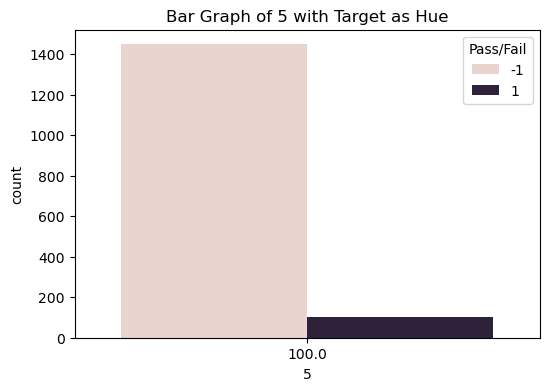

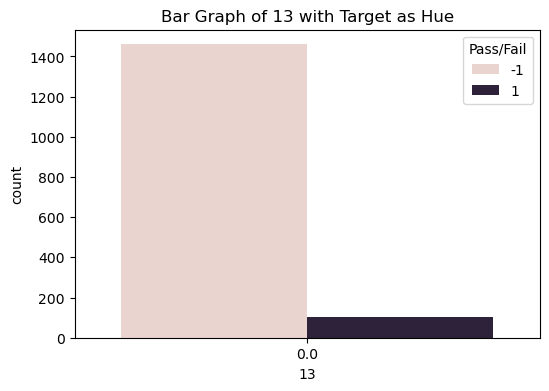

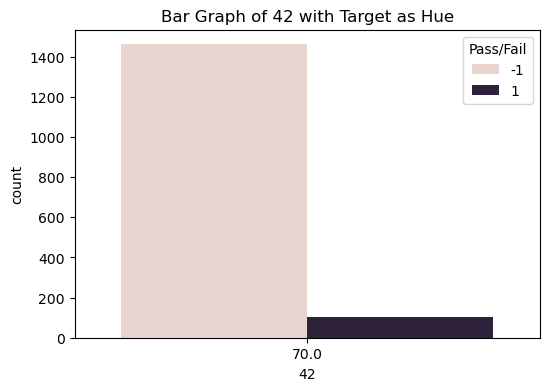

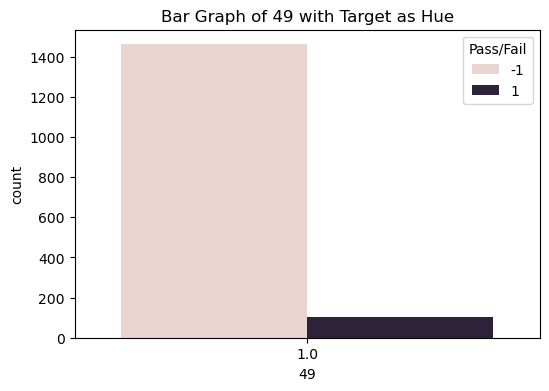

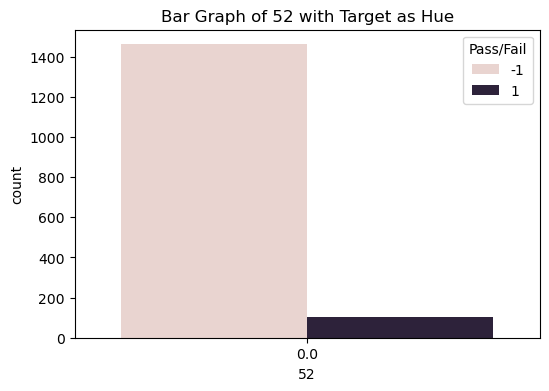

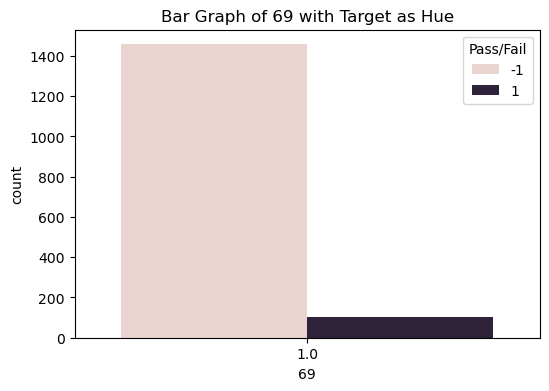

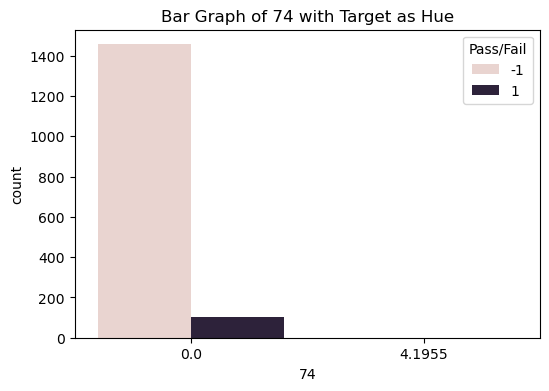

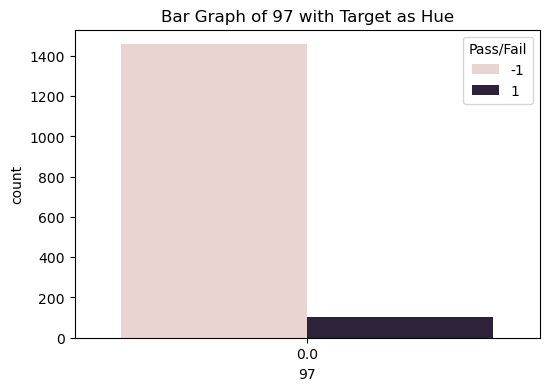

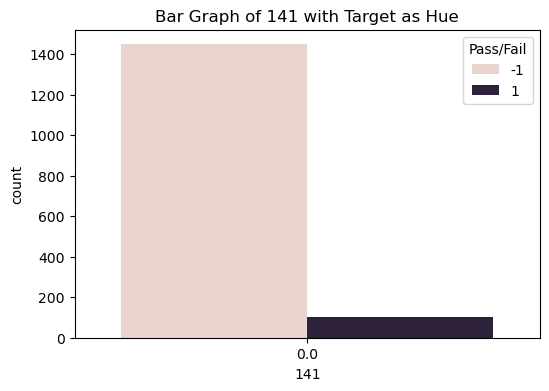

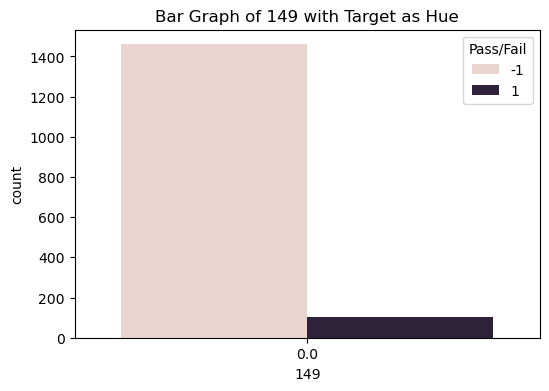

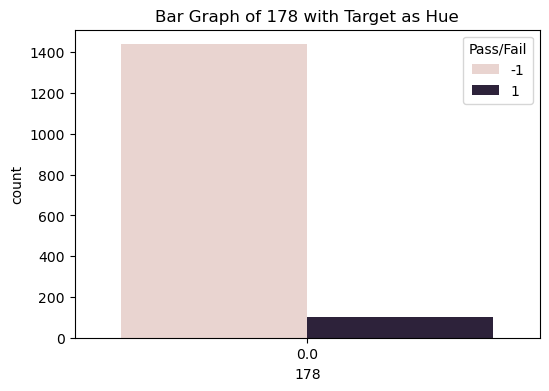

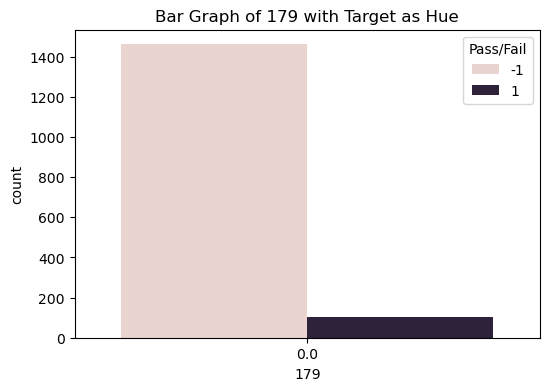

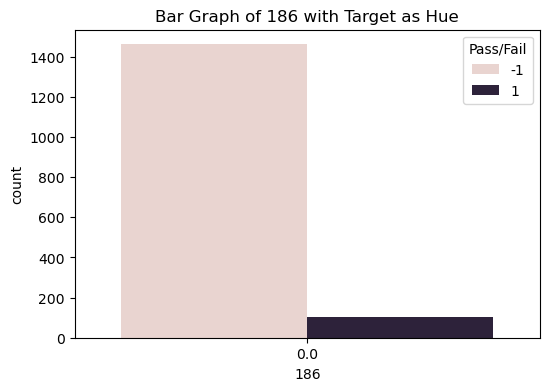

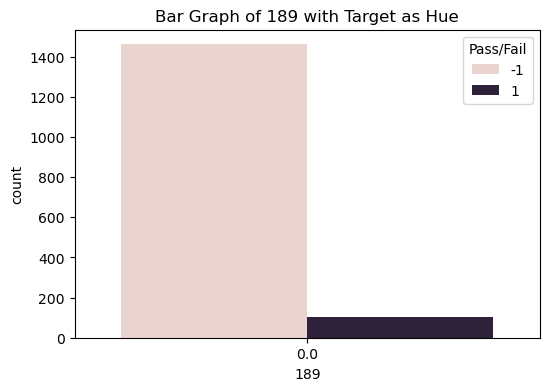

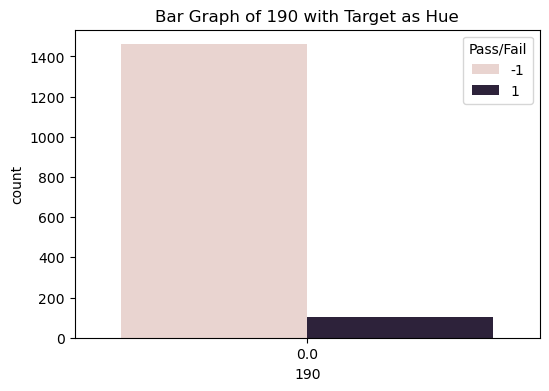

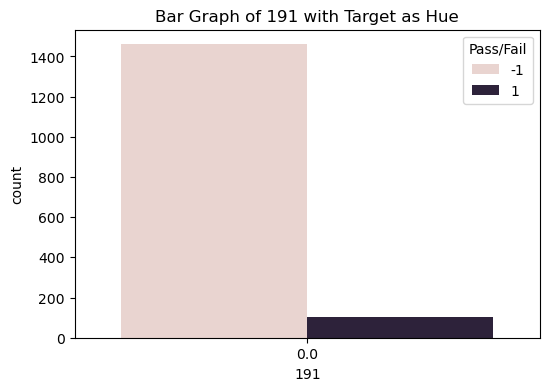

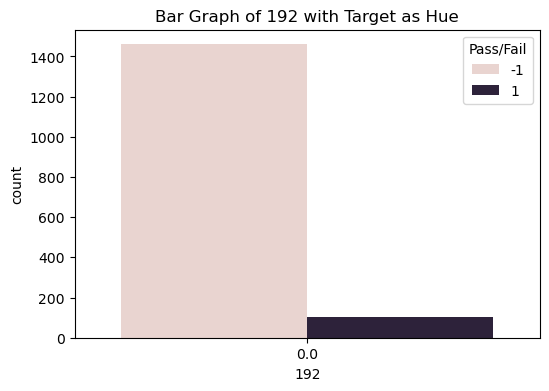

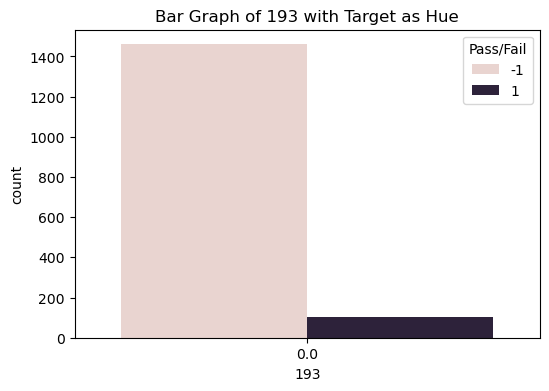

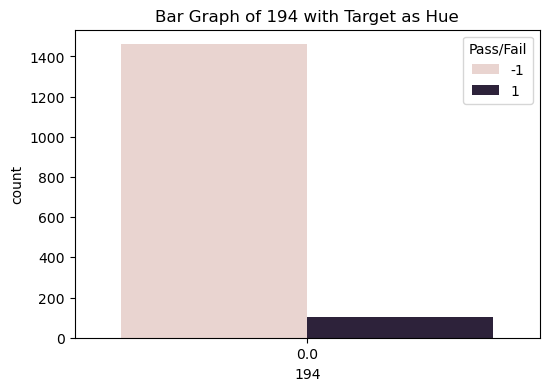

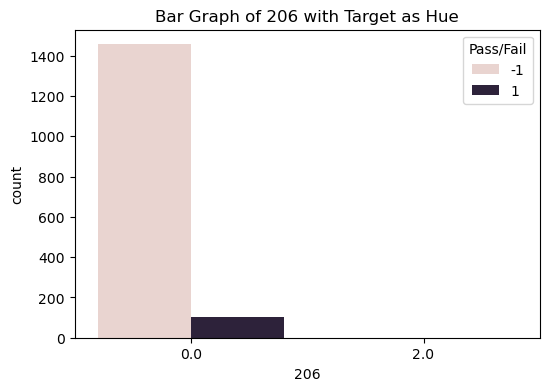

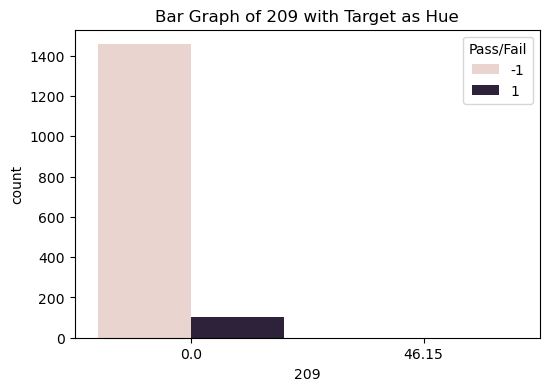

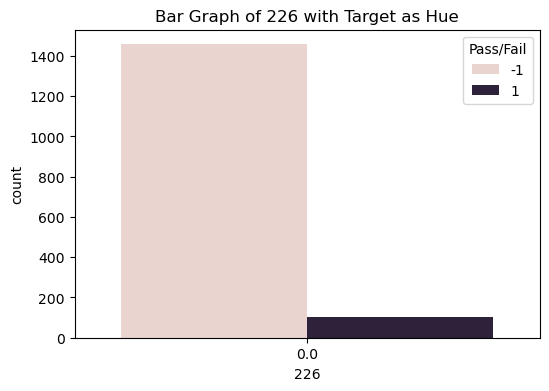

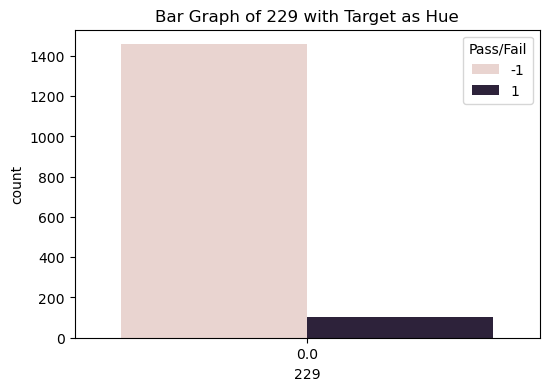

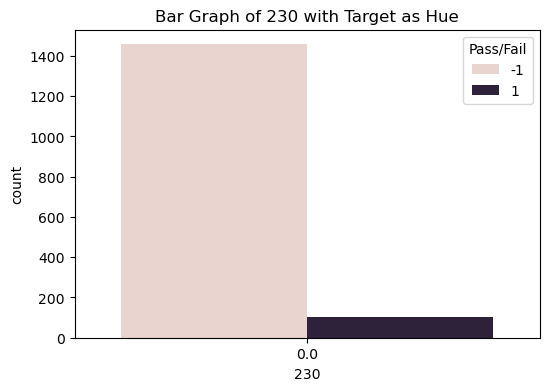

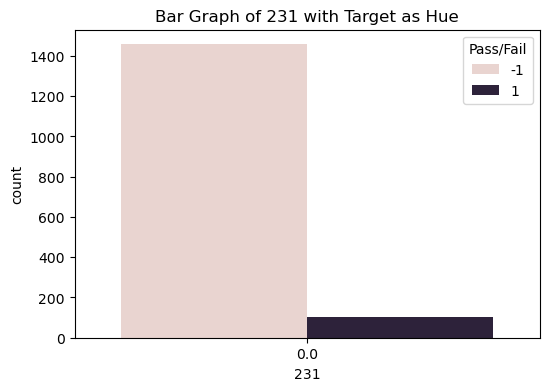

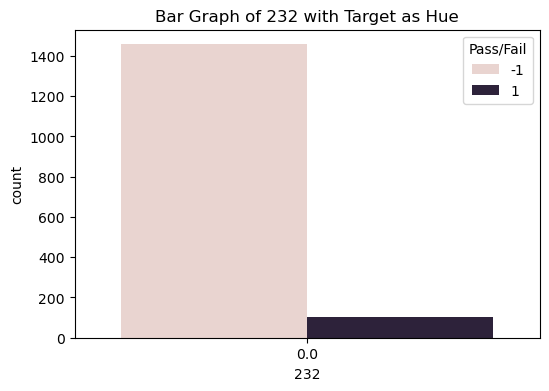

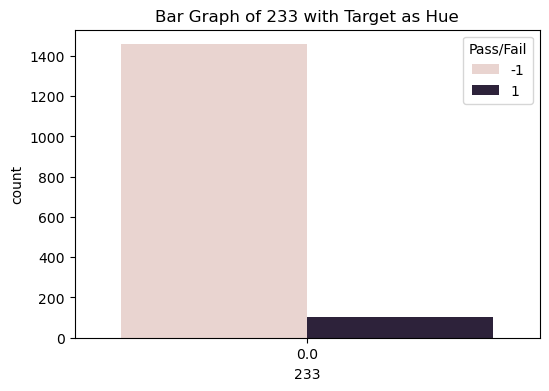

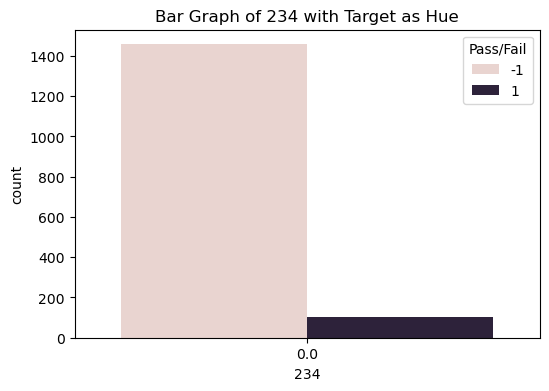

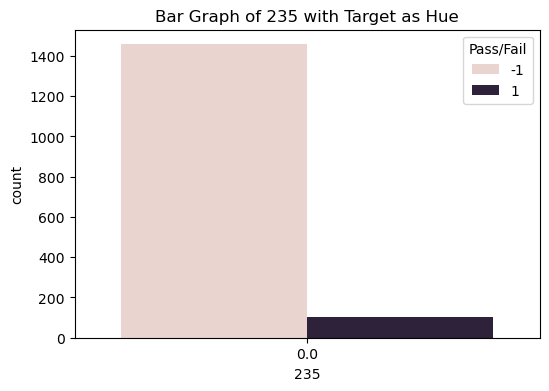

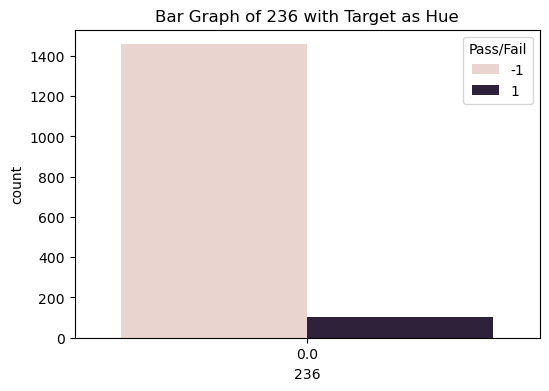

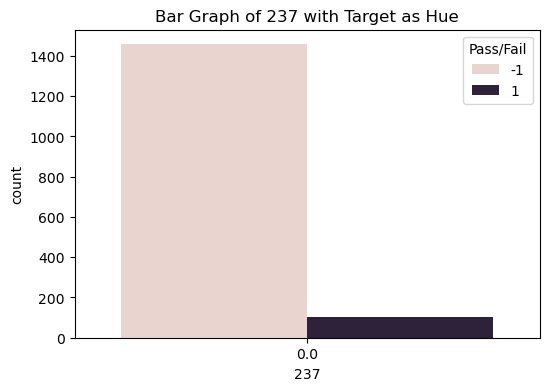

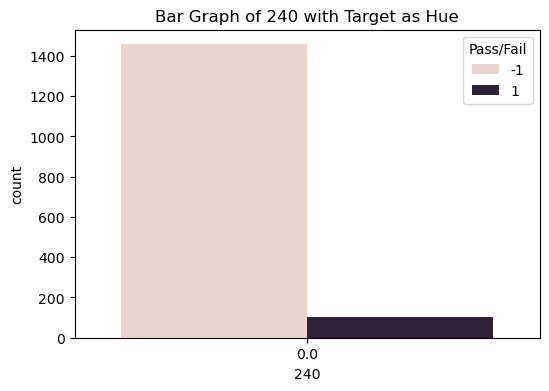

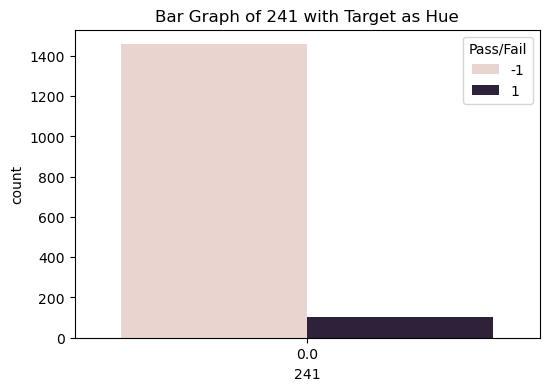

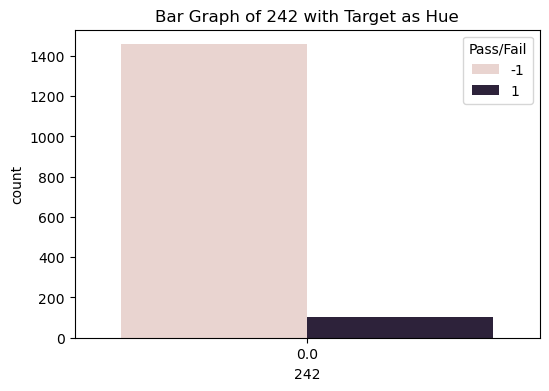

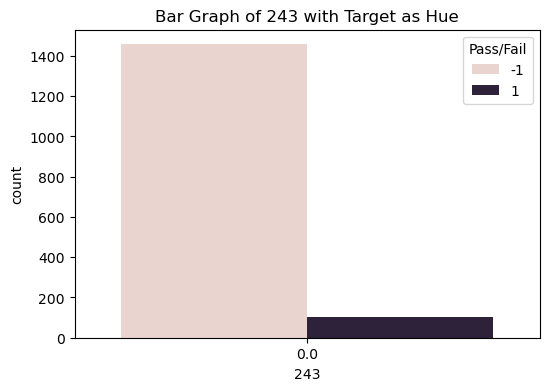

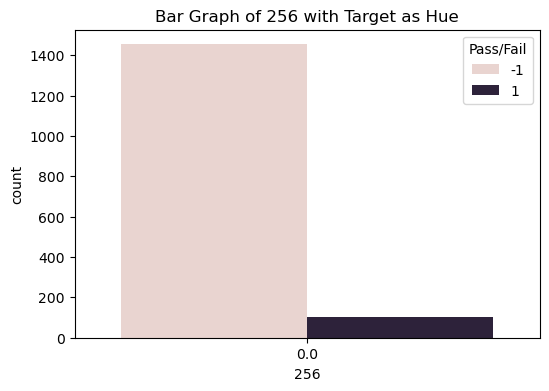

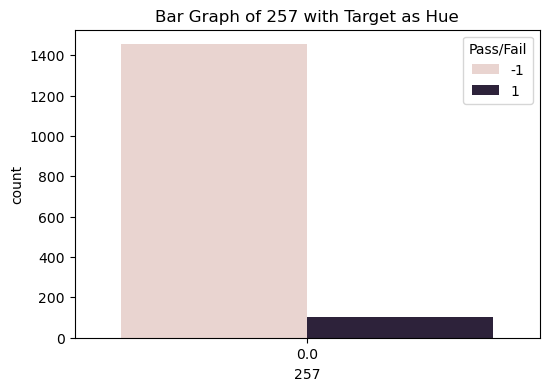

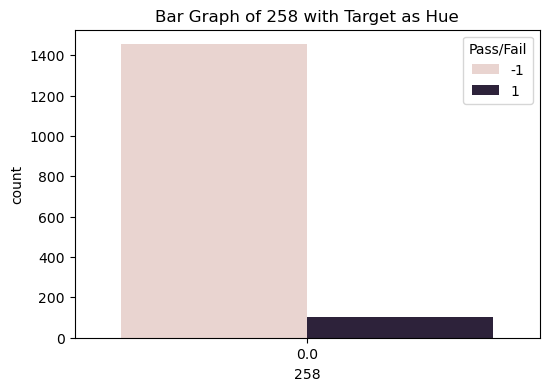

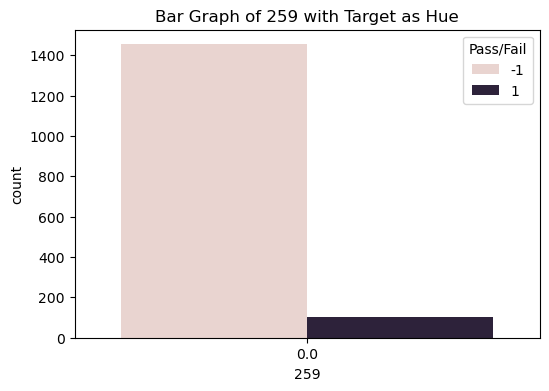

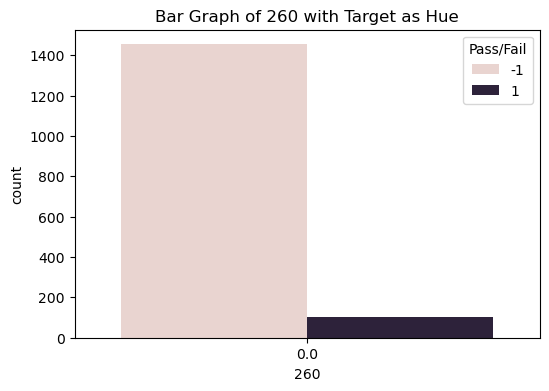

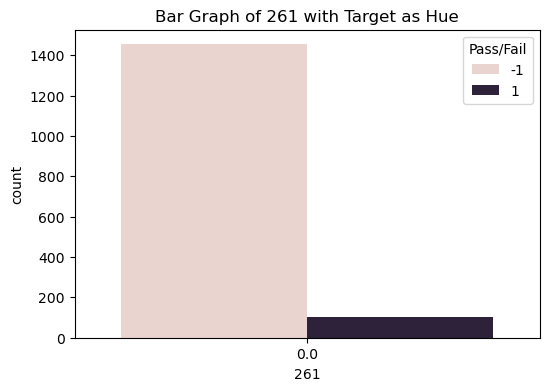

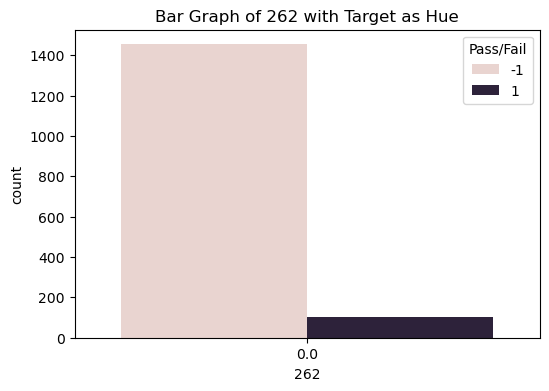

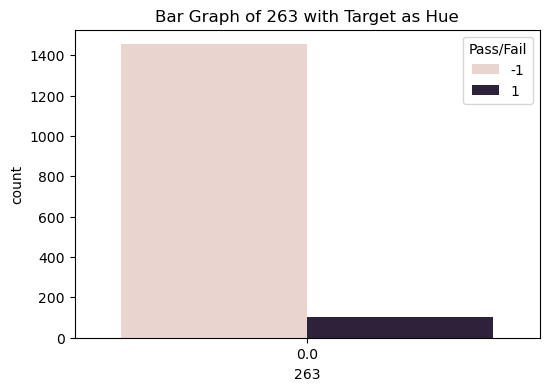

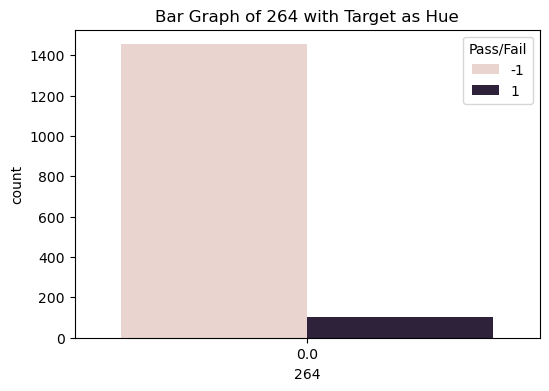

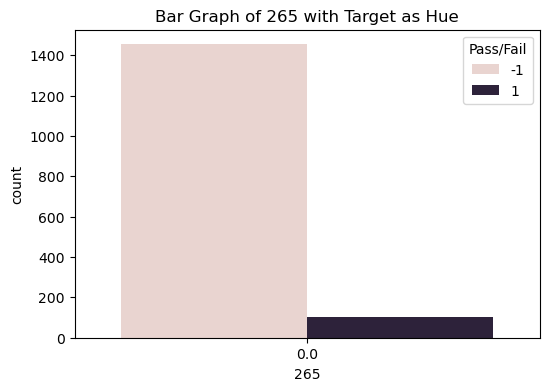

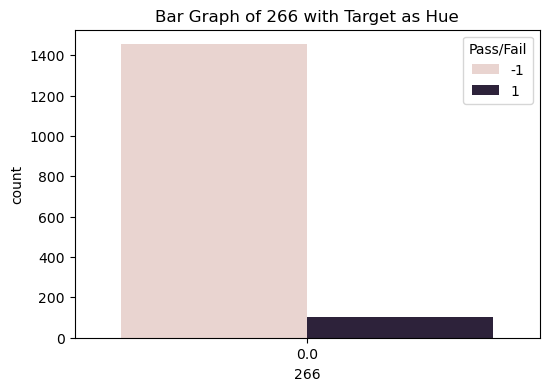

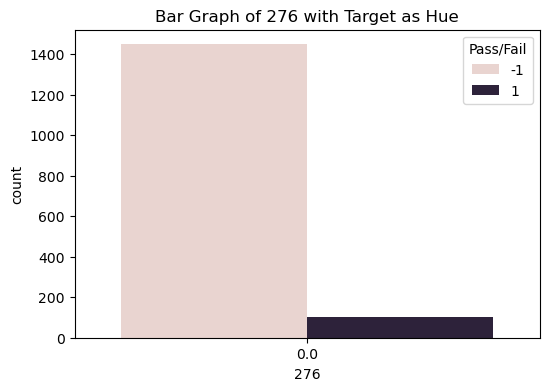

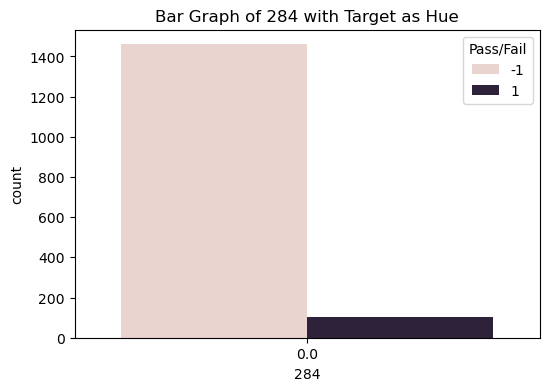

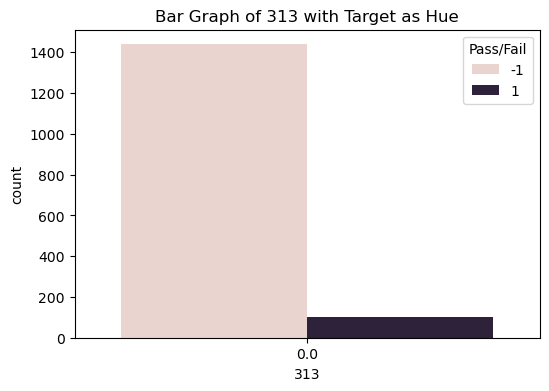

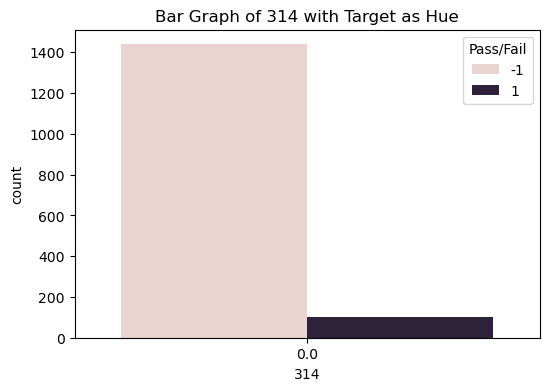

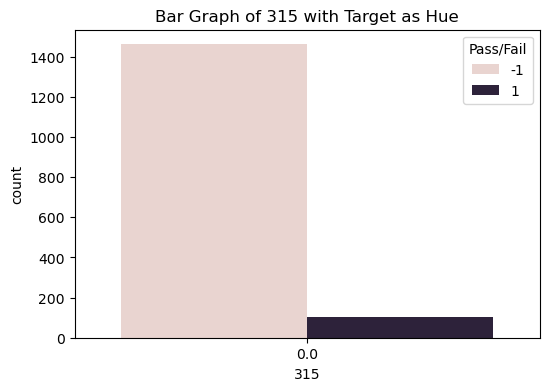

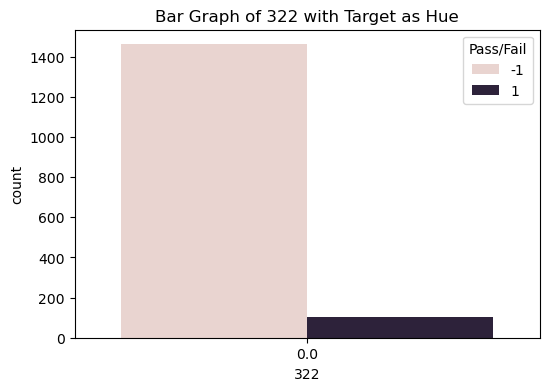

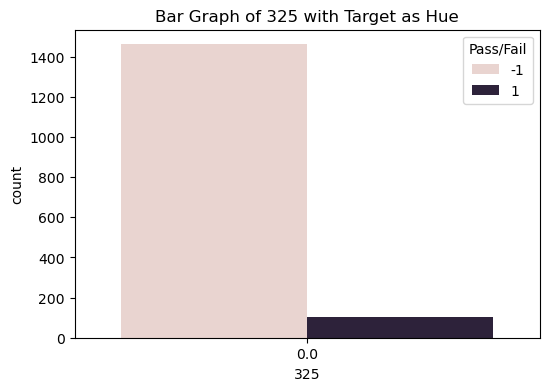

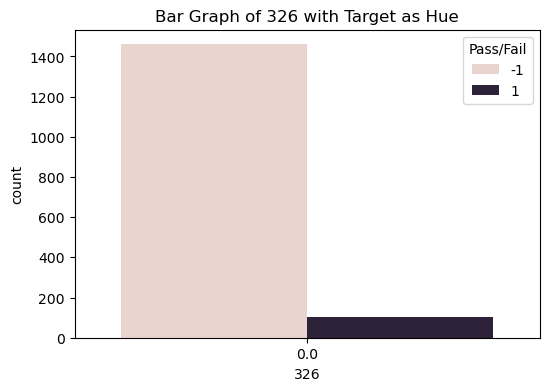

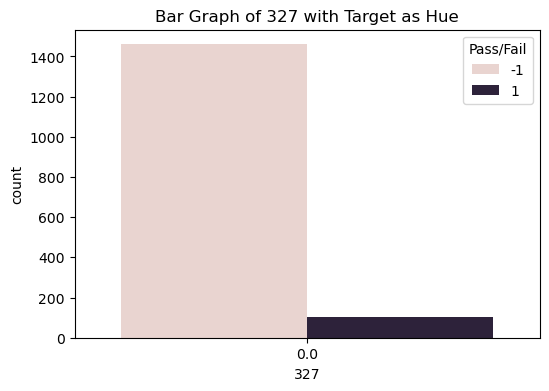

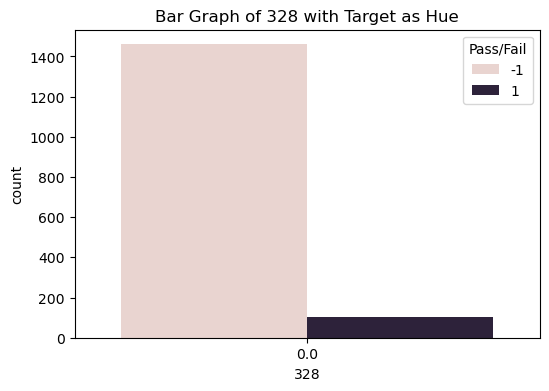

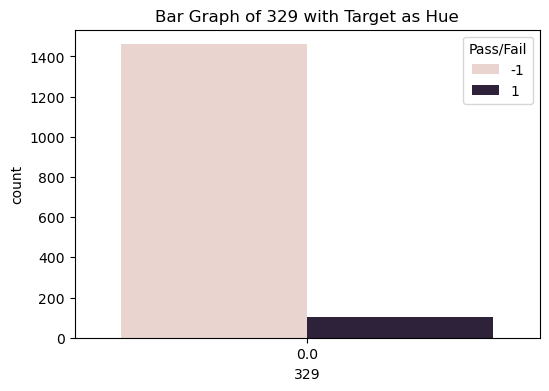

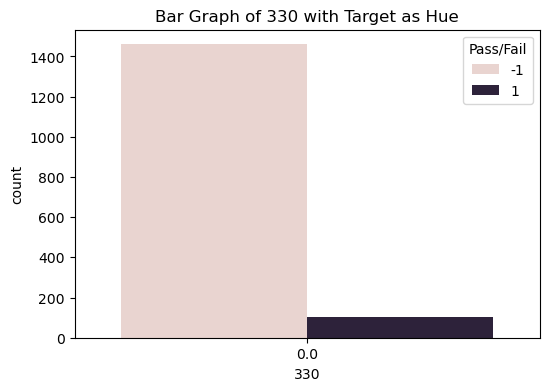

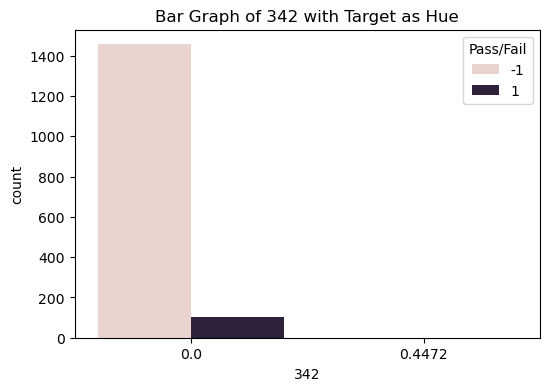

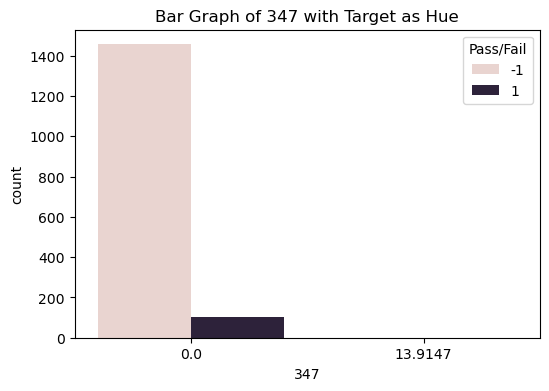

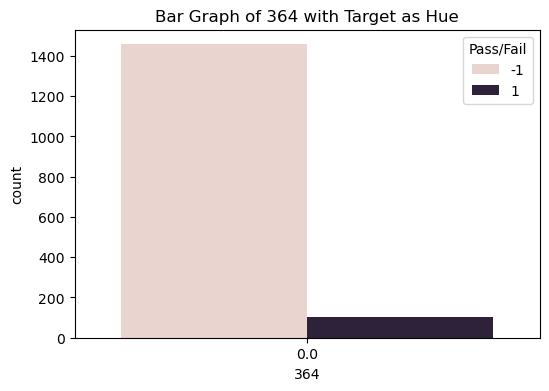

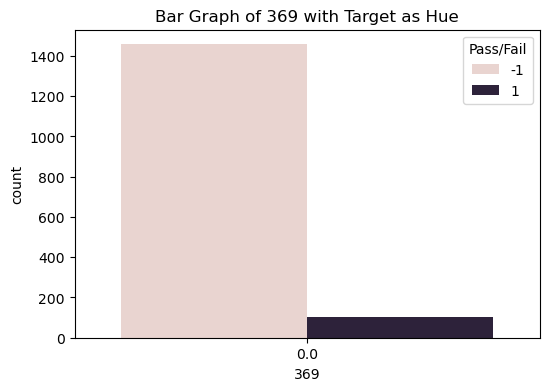

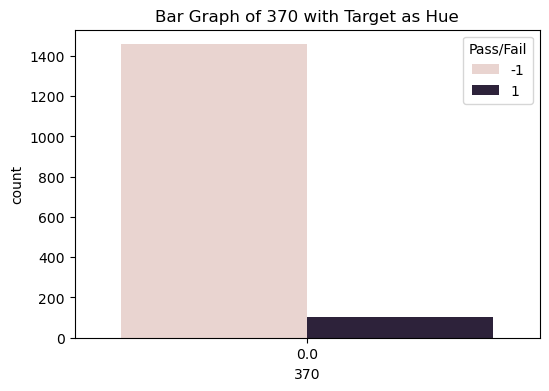

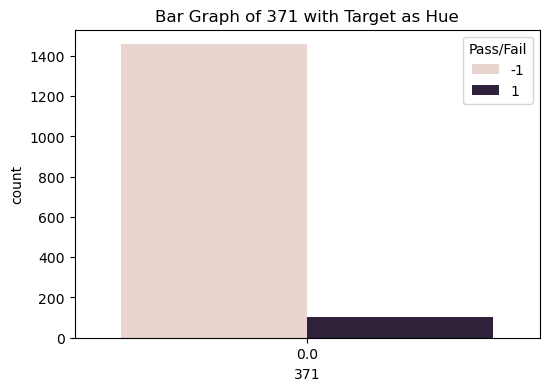

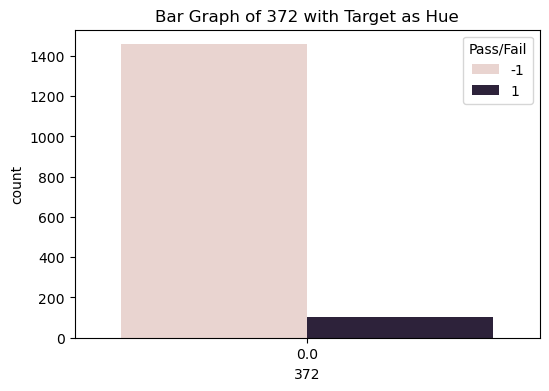

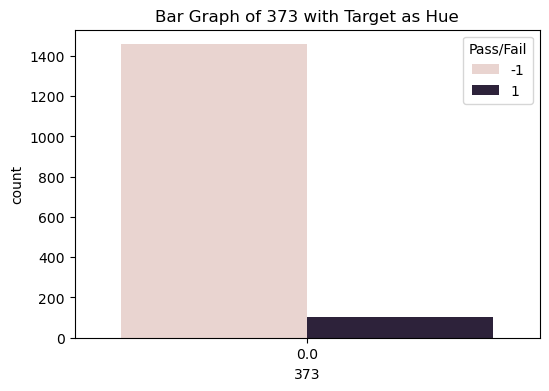

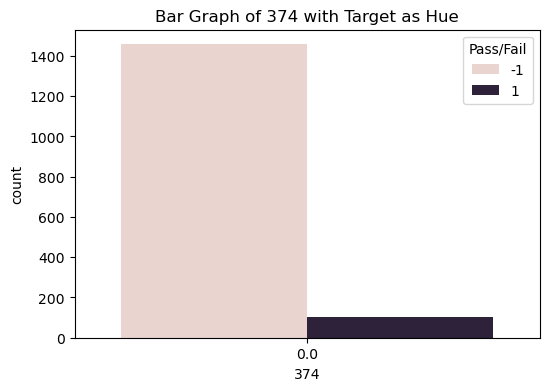

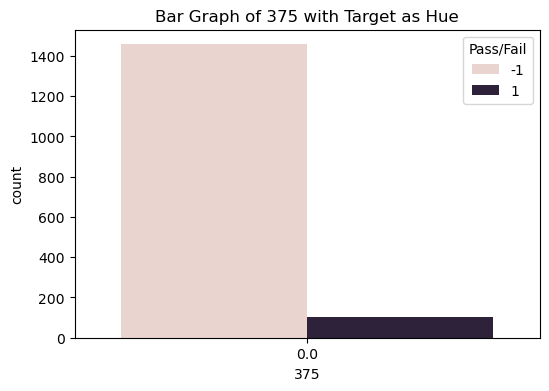

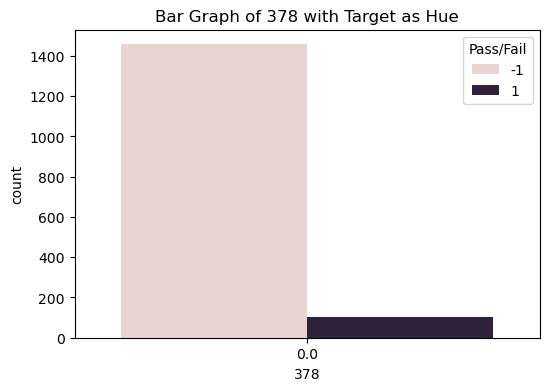

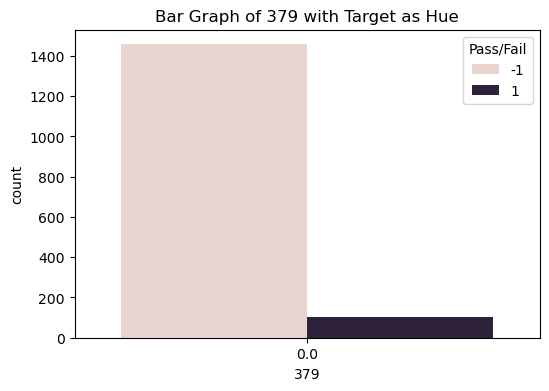

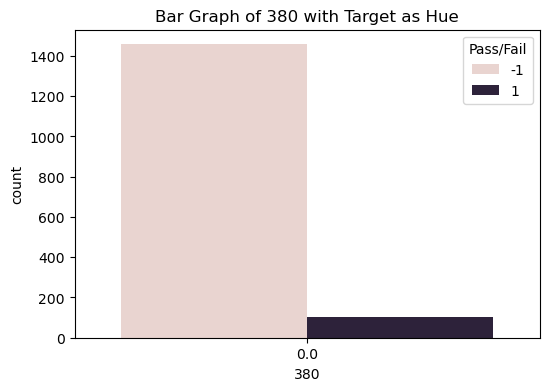

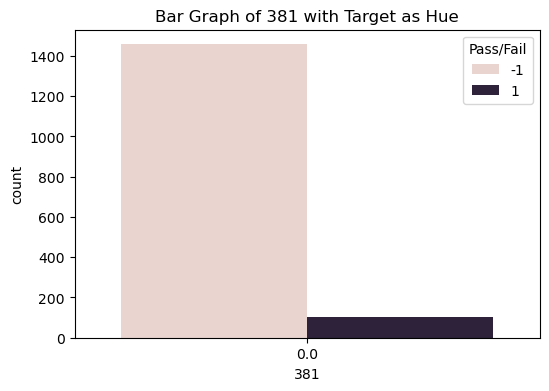

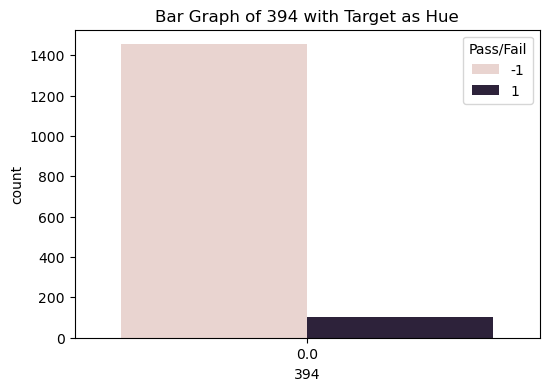

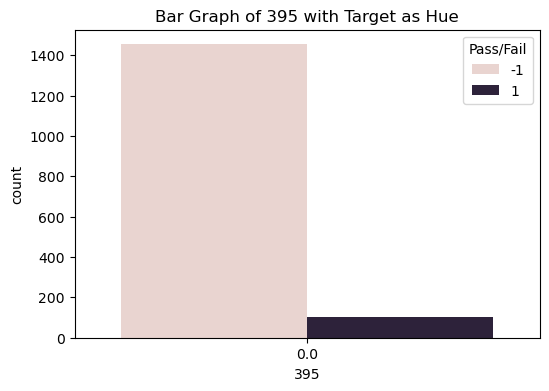

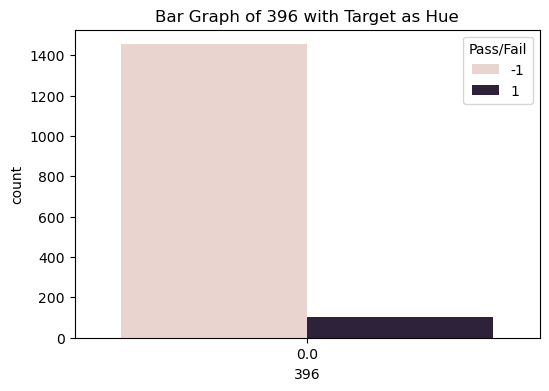

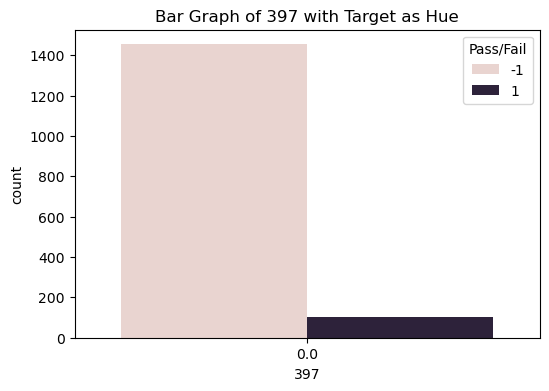

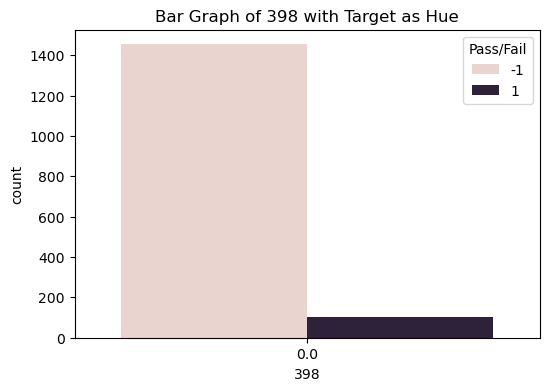

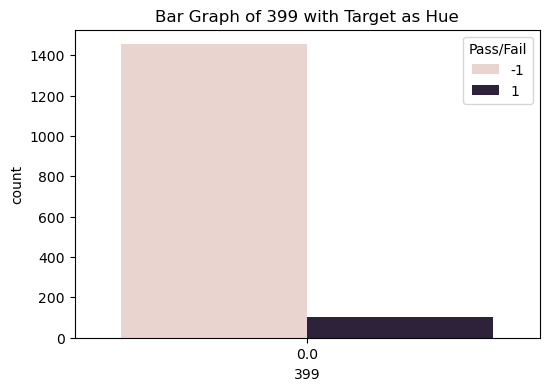

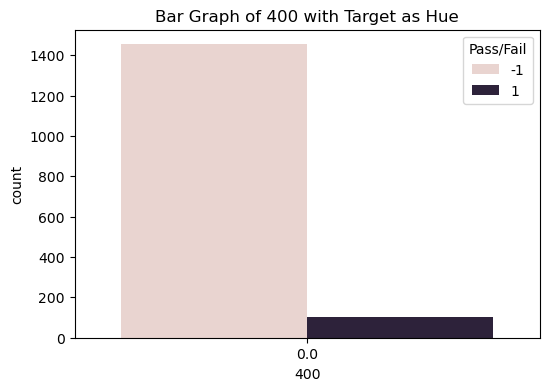

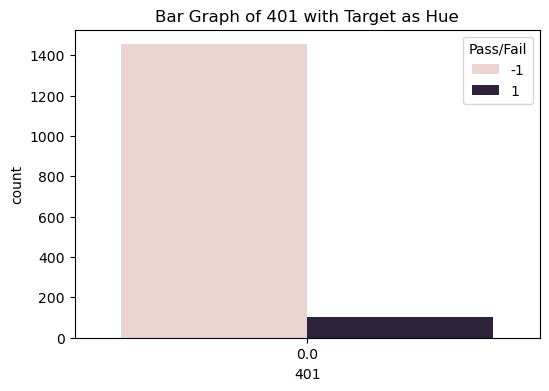

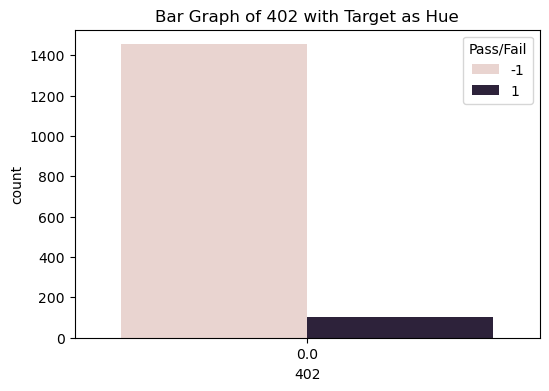

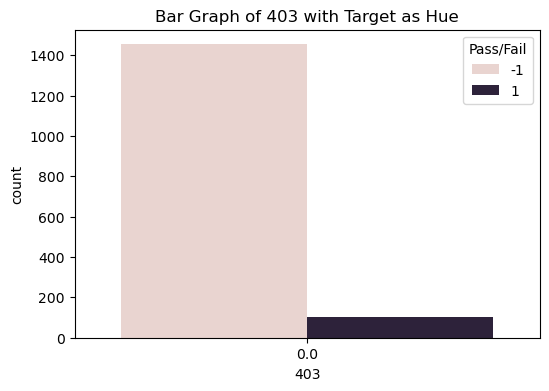

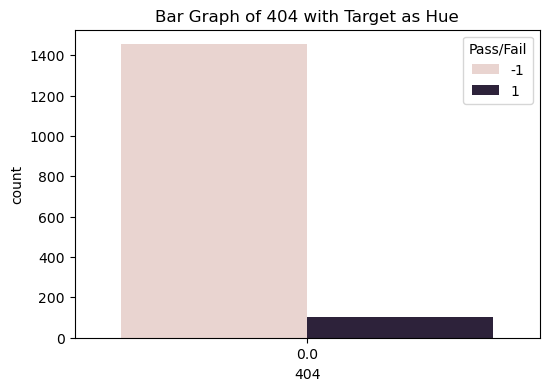

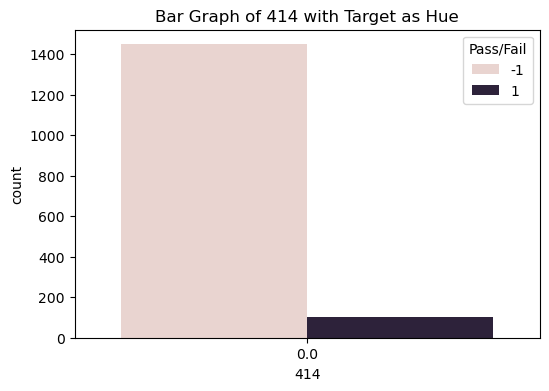

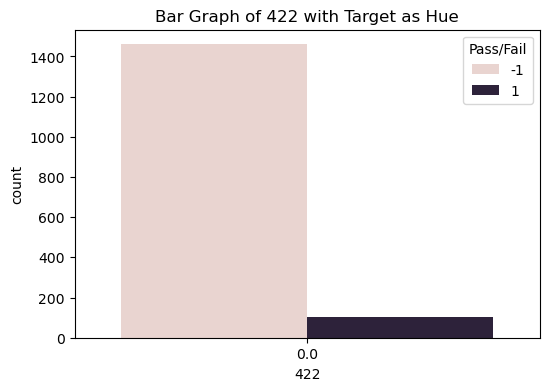

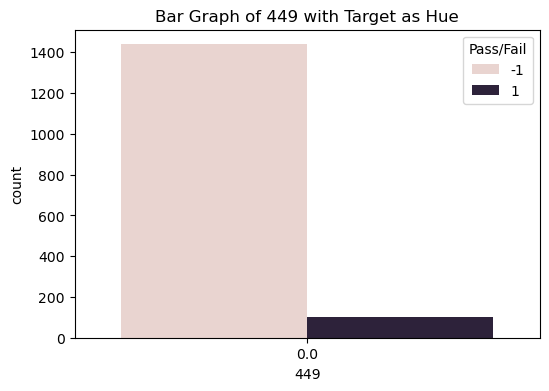

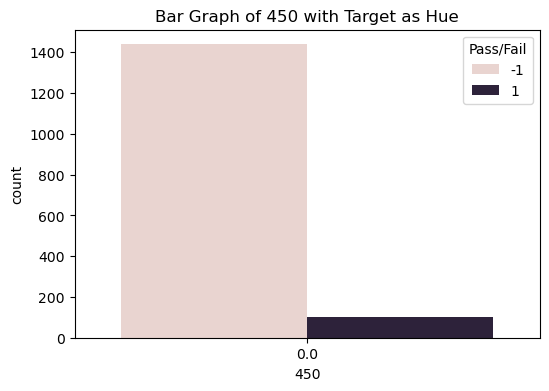

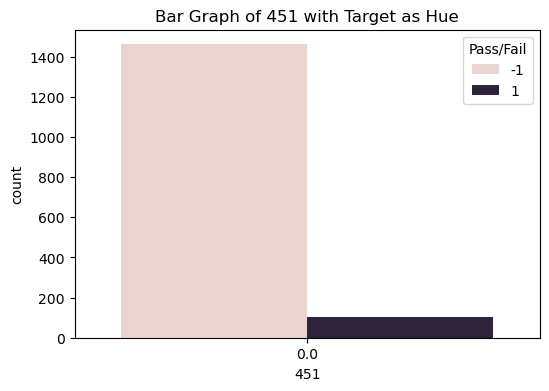

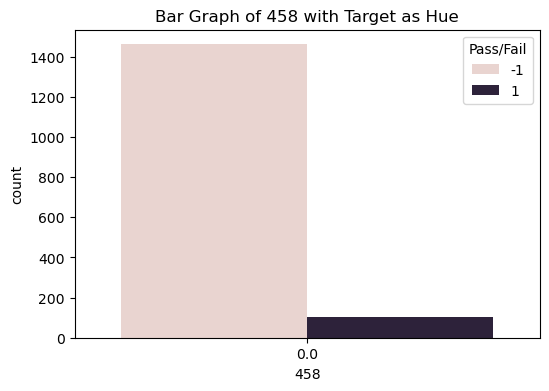

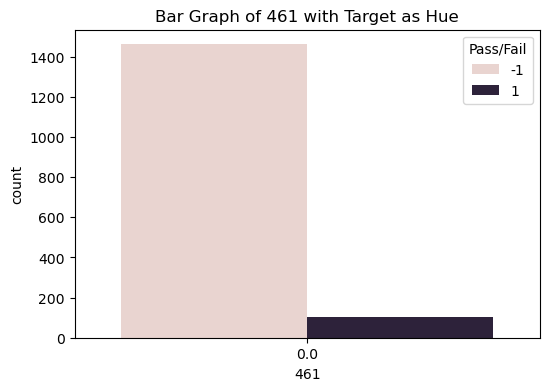

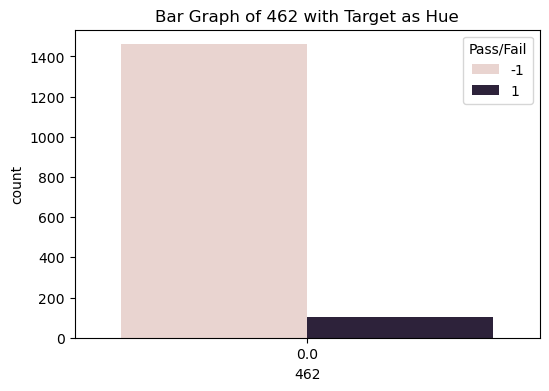

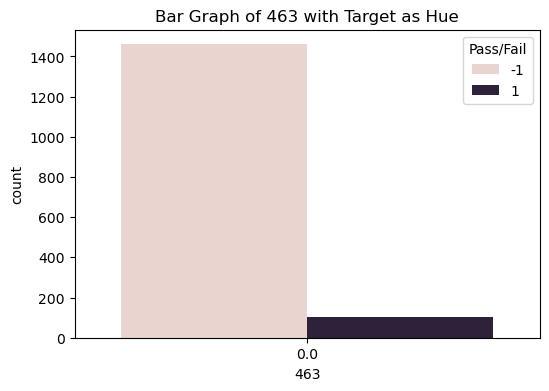

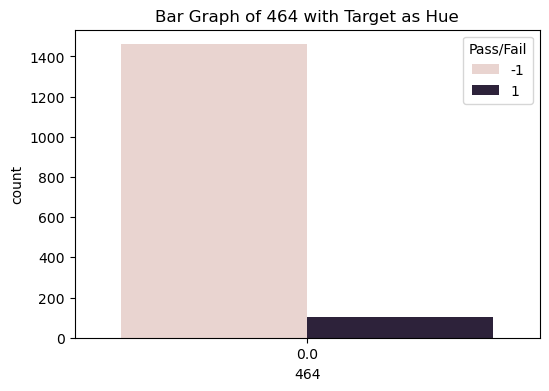

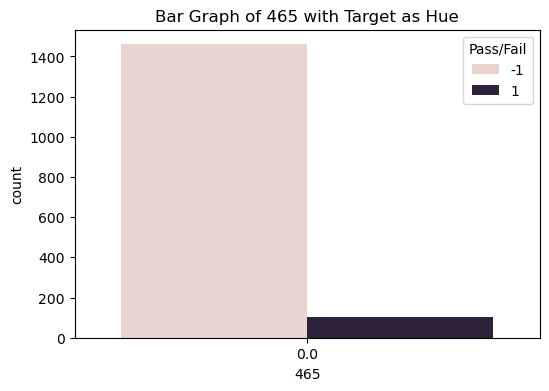

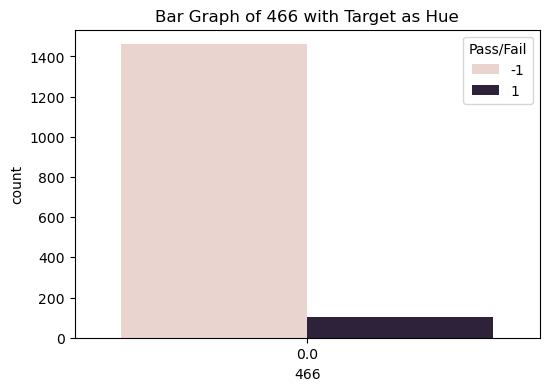

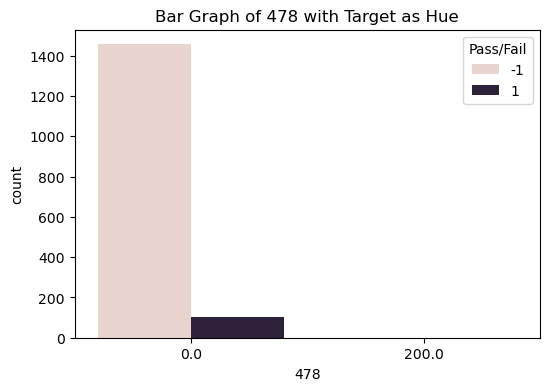

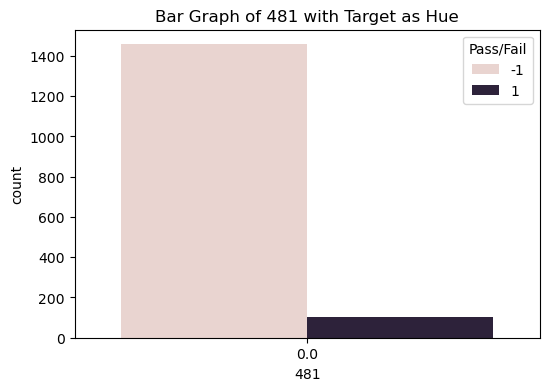

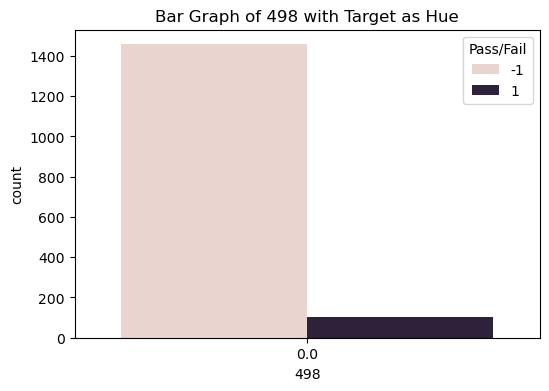

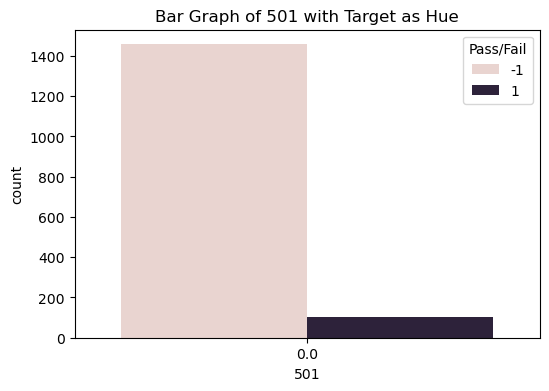

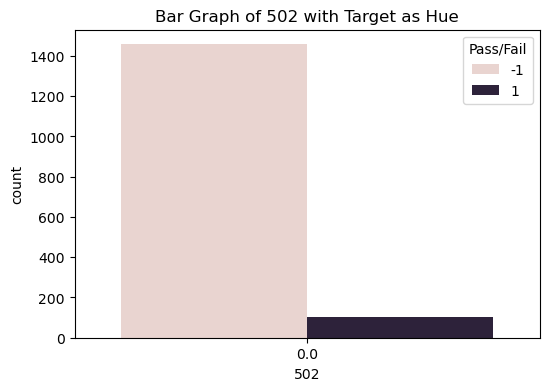

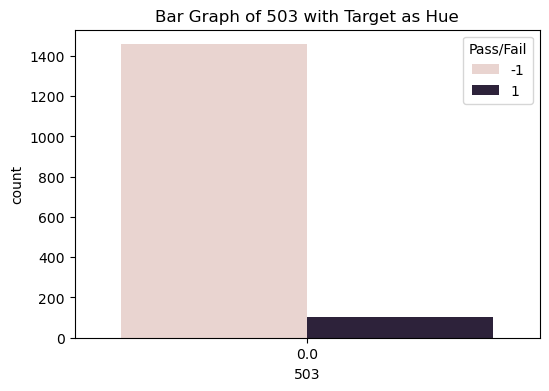

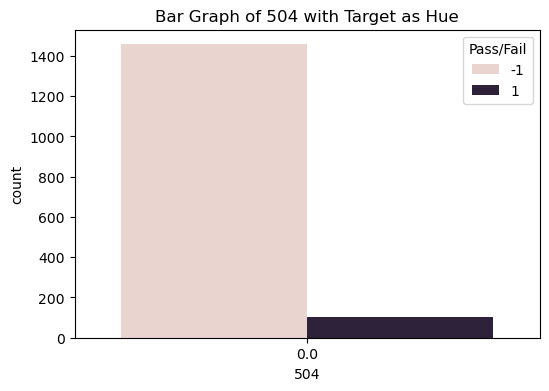

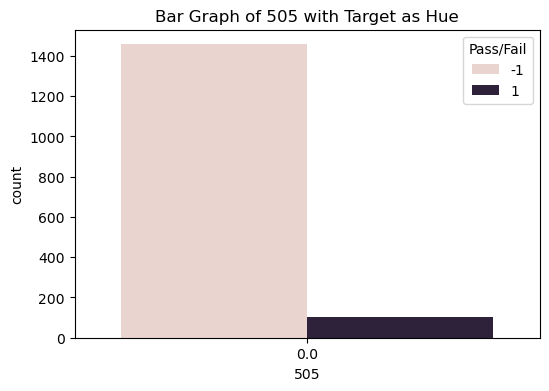

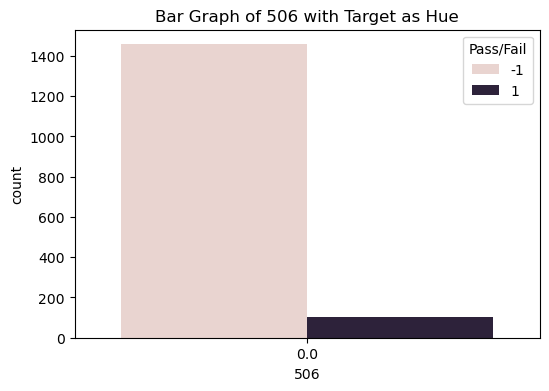

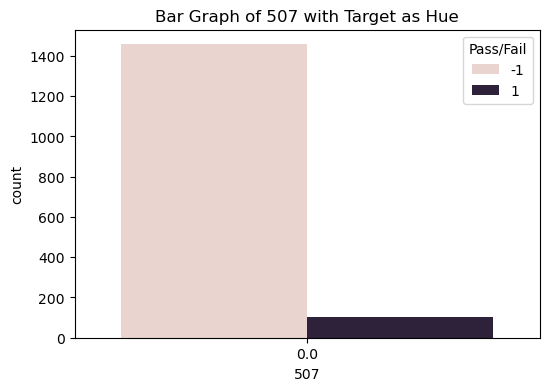

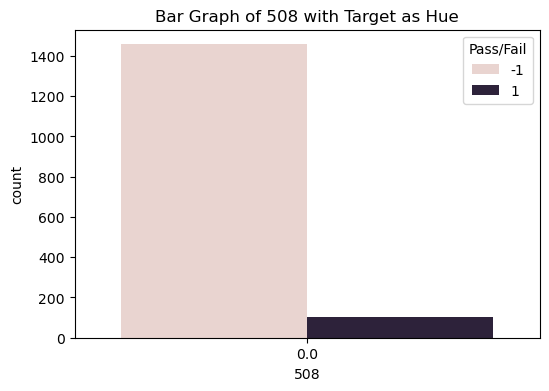

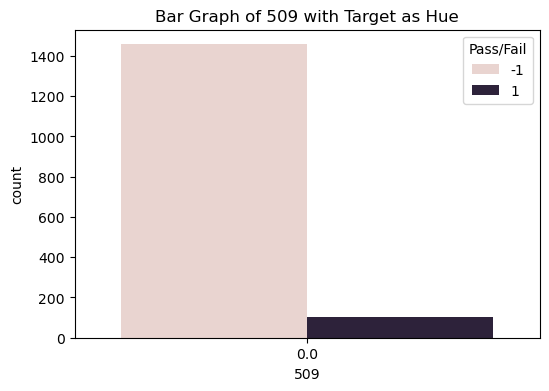

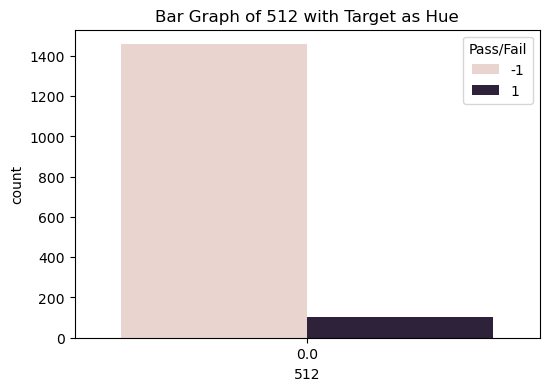

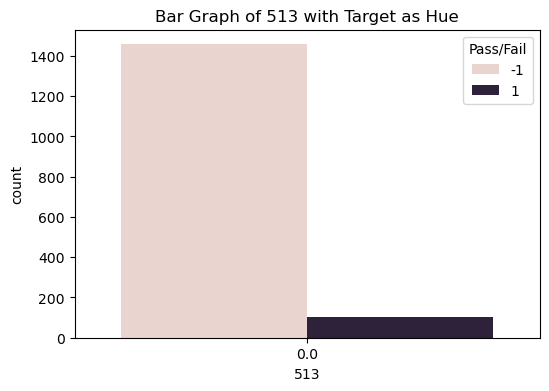

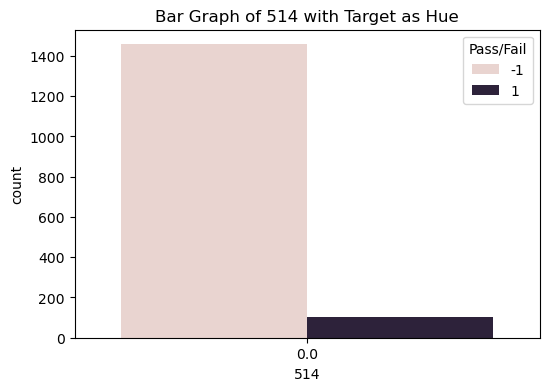

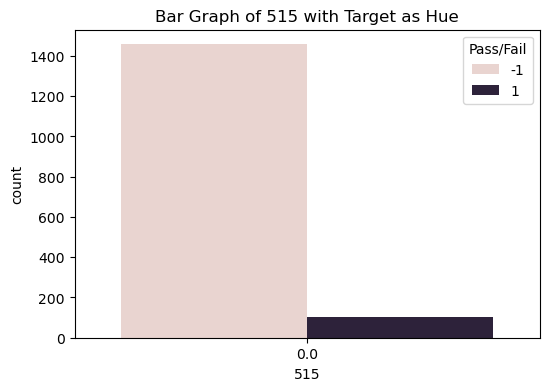

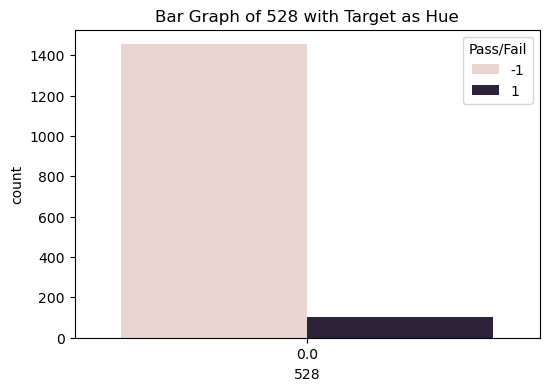

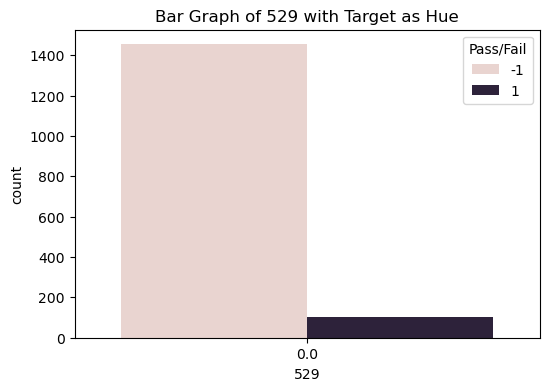

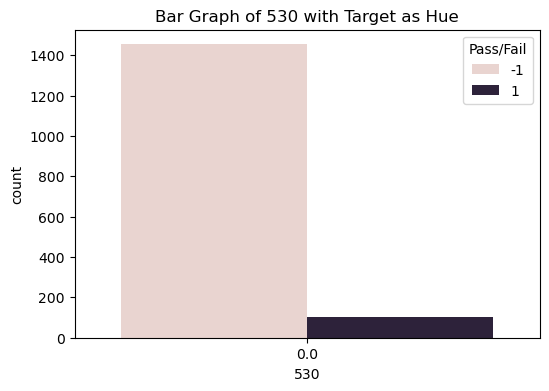

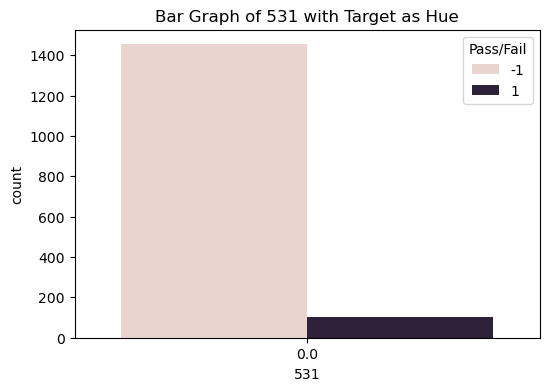

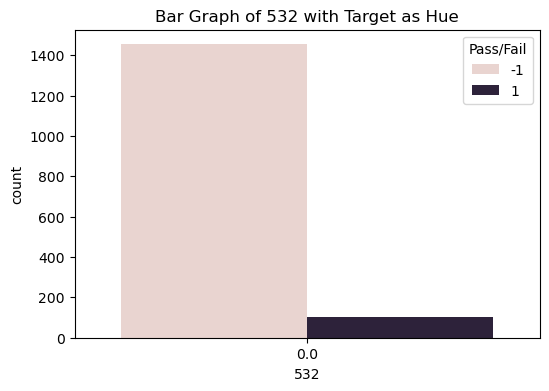

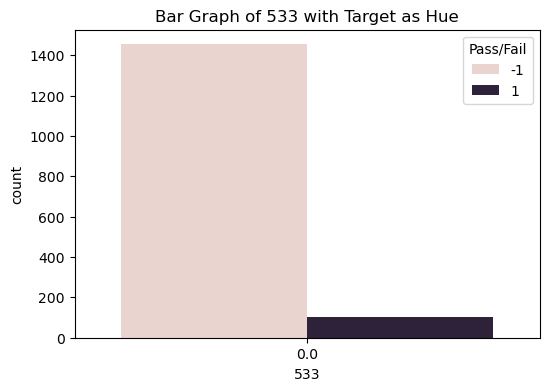

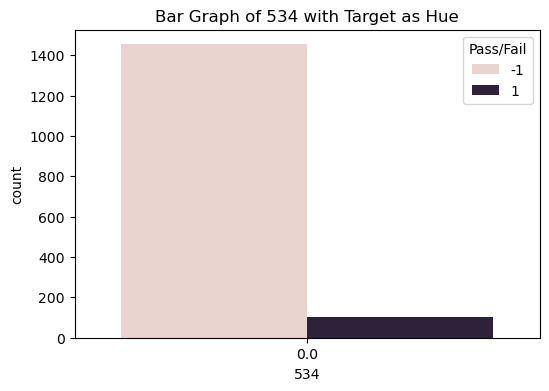

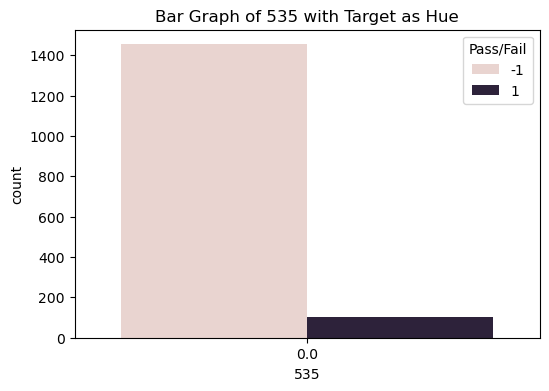

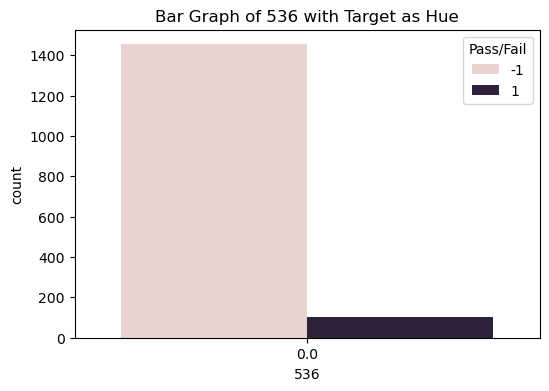

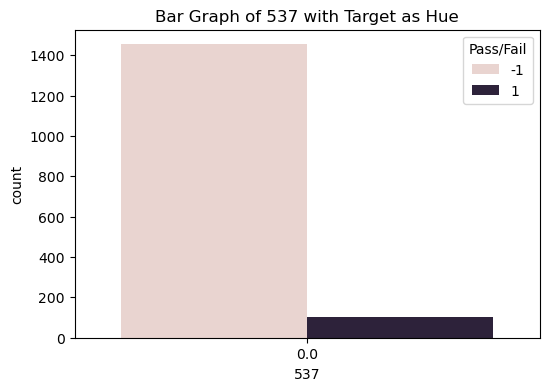

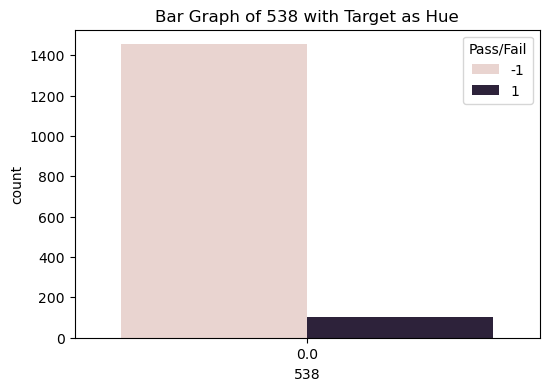

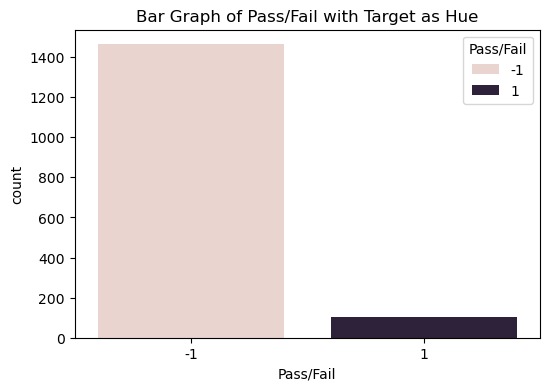

In [ ]:
# filter attribute who has one or two values and check if the results is dependent on this
# If it has all pass or fail we can assume the feature may has impact on the result

filtered_attributes = [col for col in df.columns if df[col].nunique() <= 2]

# Plot bar graphs for each filtered attribute
for attribute in filtered_attributes:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=attribute, hue='Pass/Fail')
    plt.title(f'Bar Graph of {attribute} with Target as Hue')
    plt.show()

In [17]:

distinct_values = {attribute: df[attribute].unique() for attribute in filtered_attributes}

distinct_values

filtered_attributes.pop()

'Pass/Fail'

### Drop all the columns which has 1 to values and it does not have any impact on the final result.

In [22]:
drop_const = df.drop(columns=filtered_attributes)
drop_const.shape

(1567, 469)

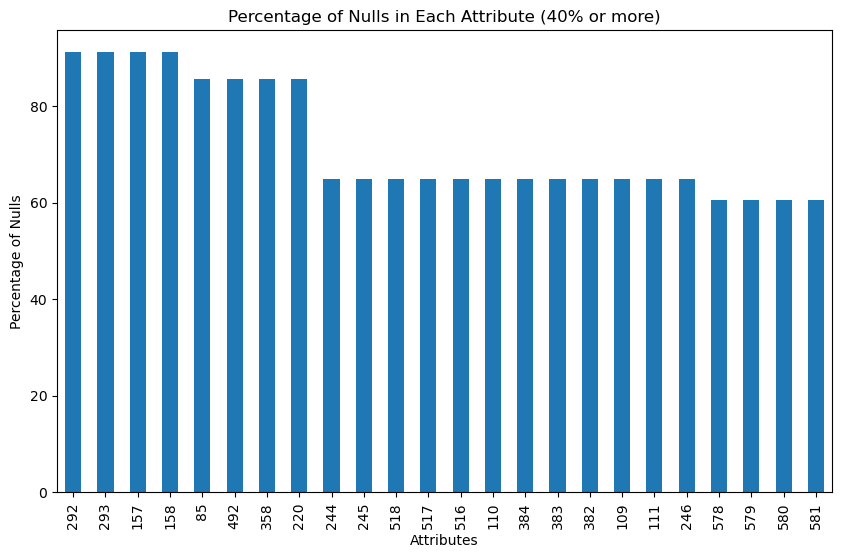

In [24]:
# Count nulls in each attribute
null_counts = drop_const.isnull().sum()

# Calculate percentage of nulls
null_percentages = (null_counts / len(drop_const)) * 100


# Filter attributes with 40% or more null values
filtered_null_percentages = null_percentages[null_percentages >= 60]

# Sort percentages in descending order
sorted_filtered_null_percentages = filtered_null_percentages.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
sorted_filtered_null_percentages.plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Percentage of Nulls')
plt.title('Percentage of Nulls in Each Attribute (40% or more)')
plt.show()

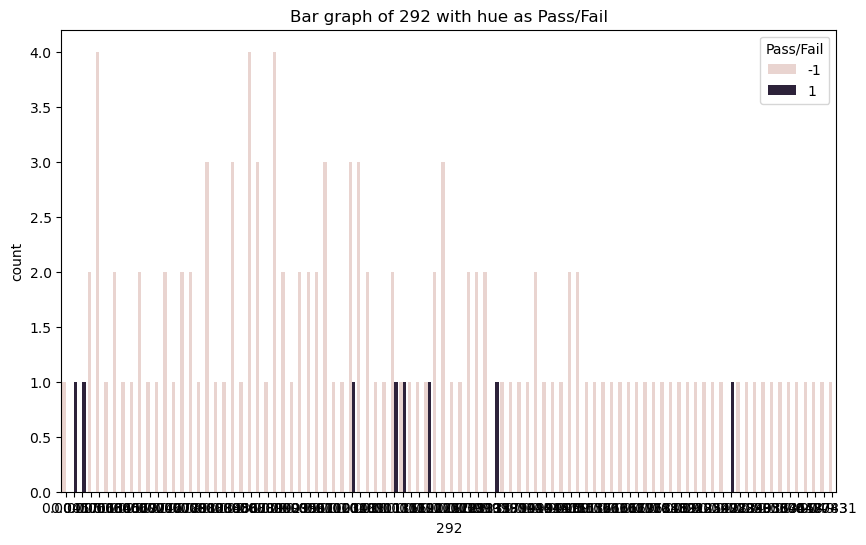

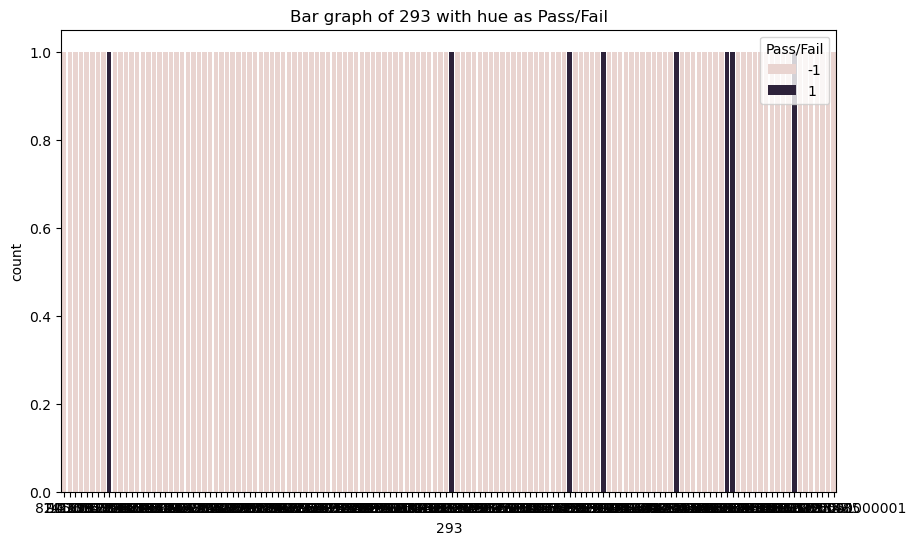

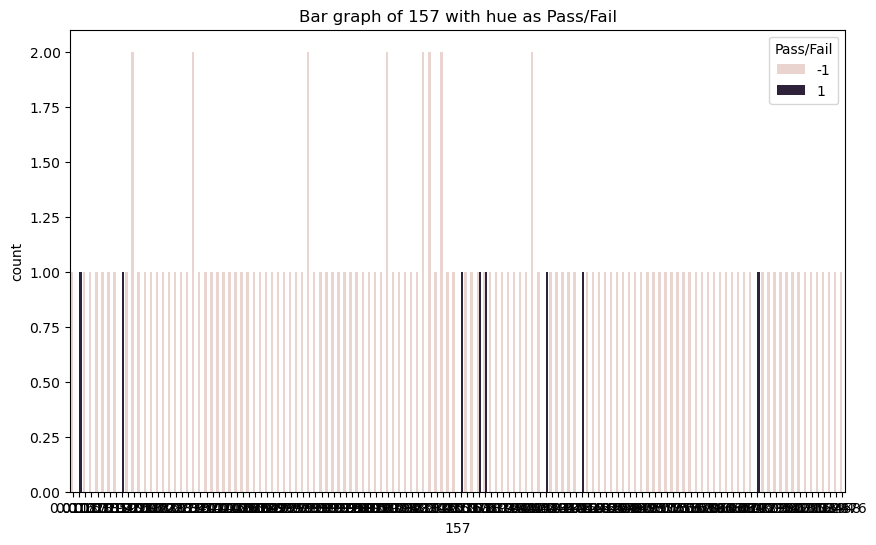

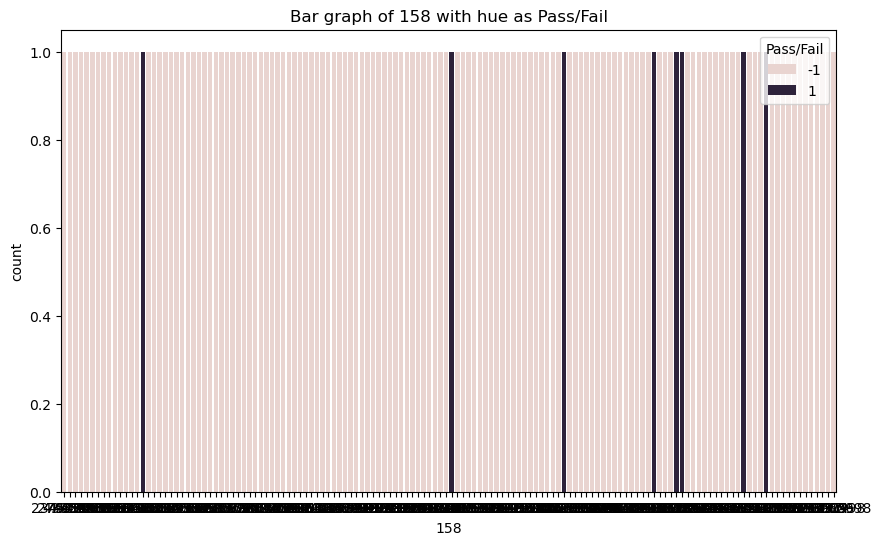

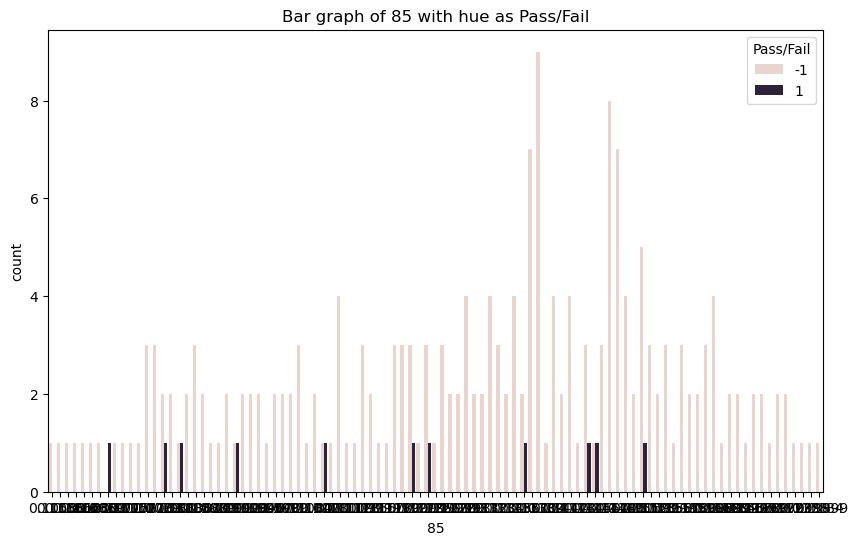

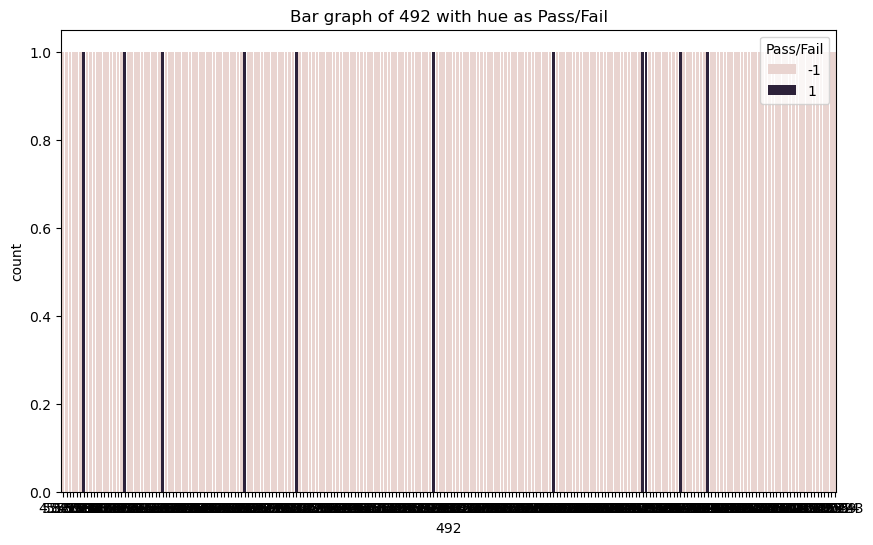

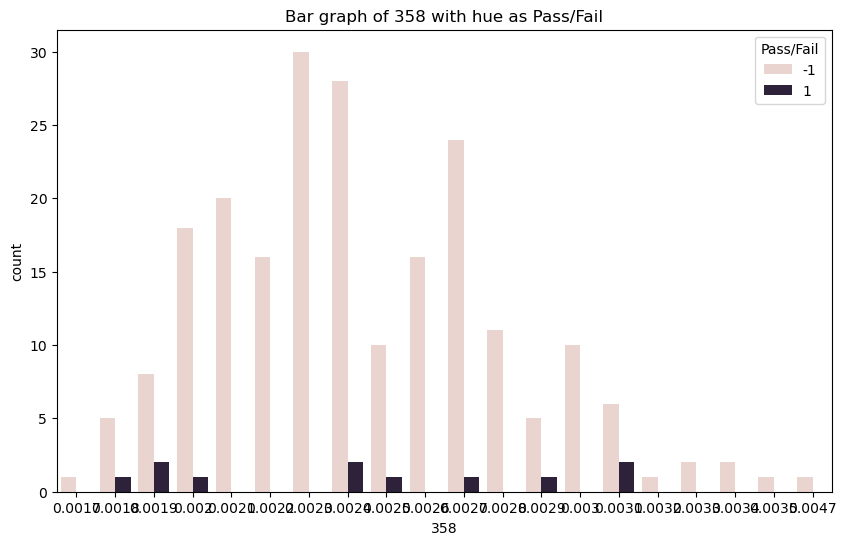

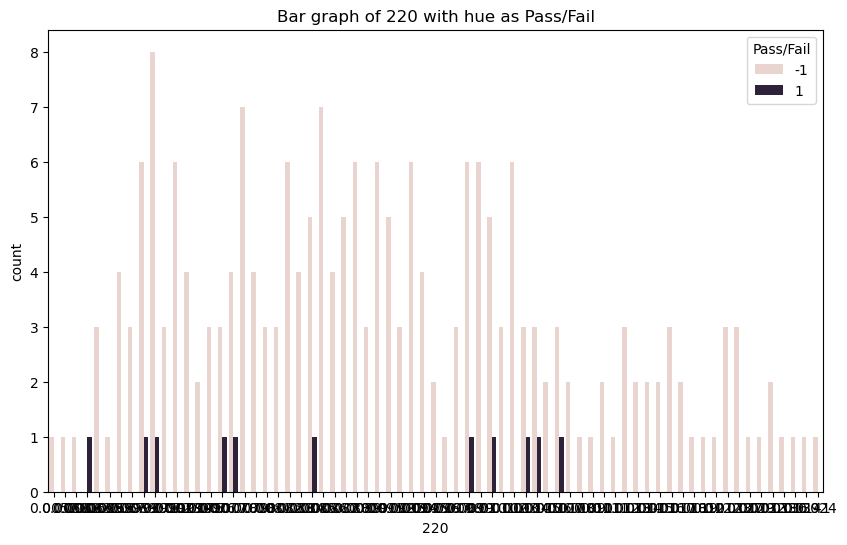

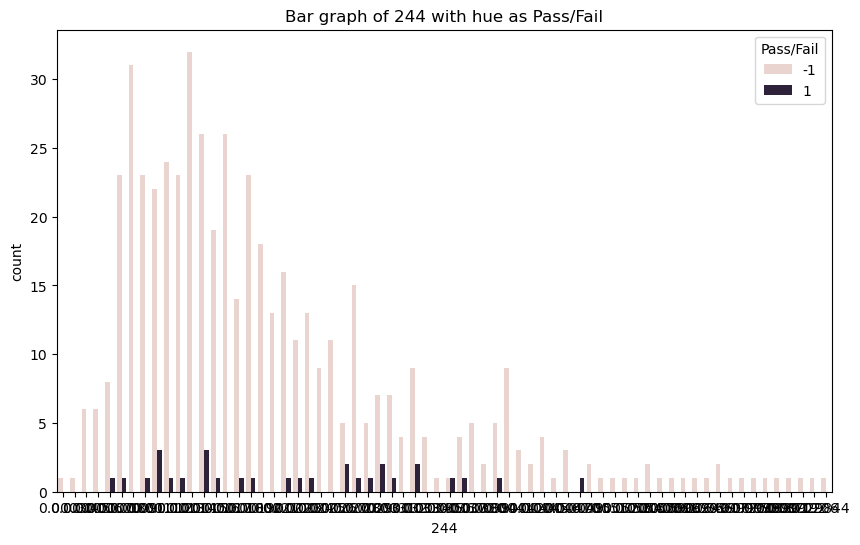

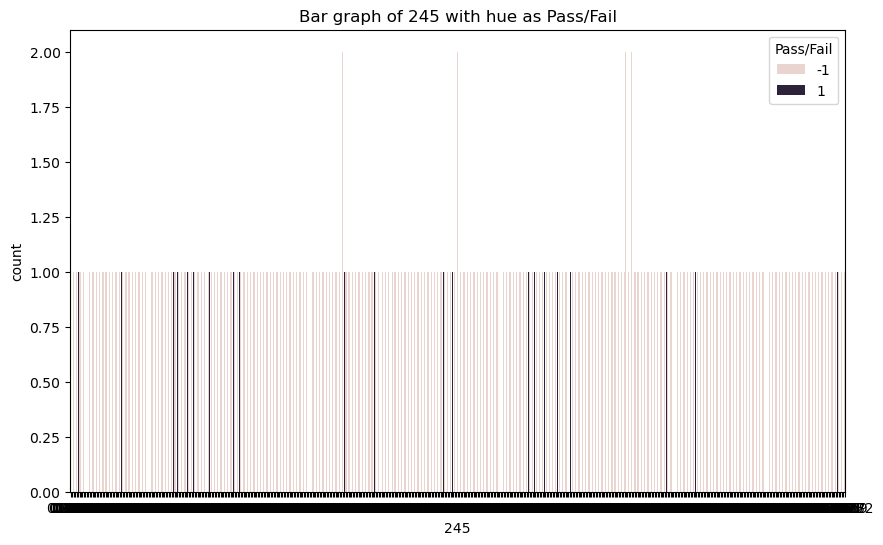

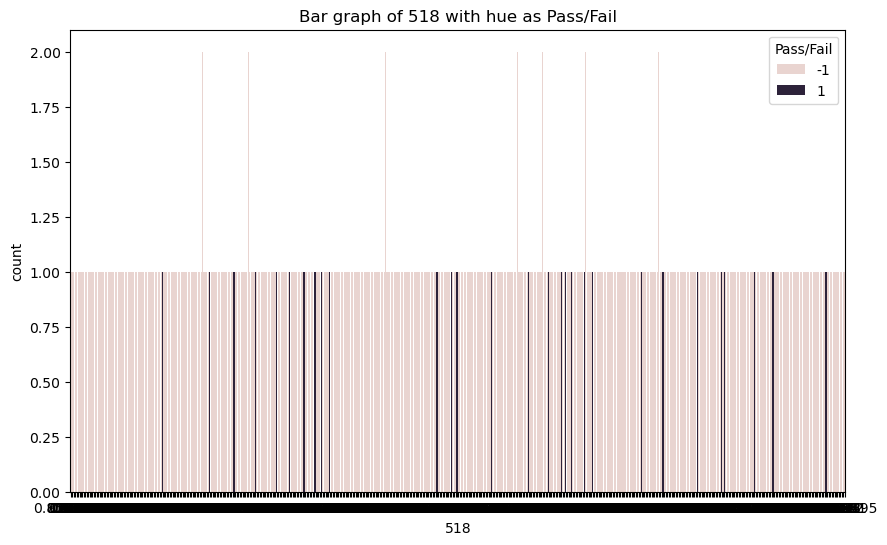

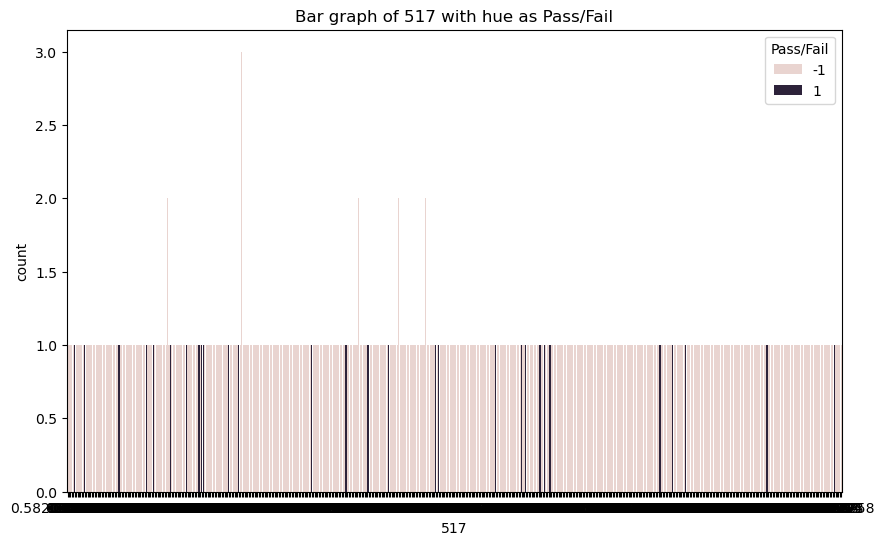

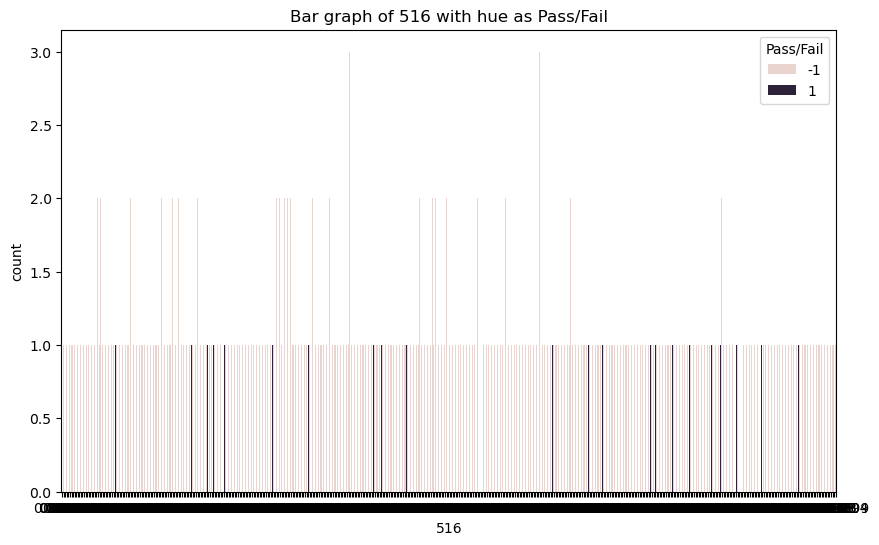

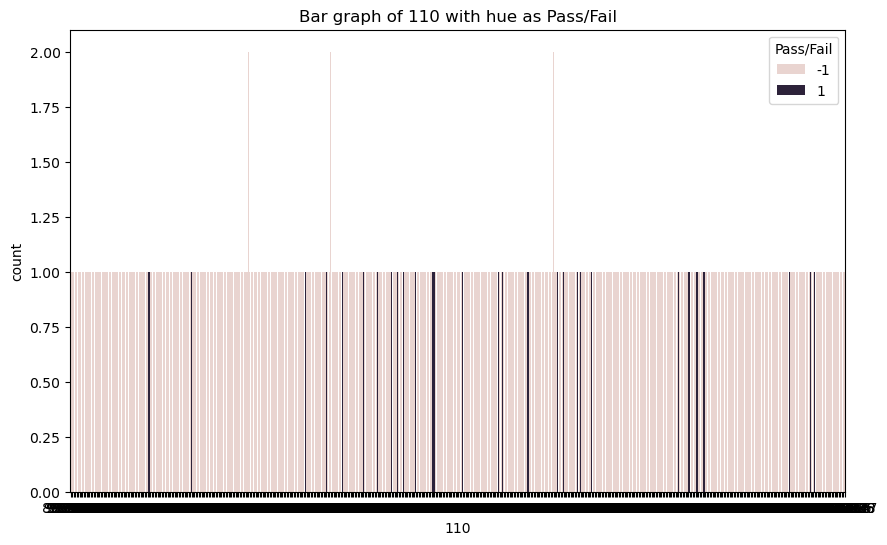

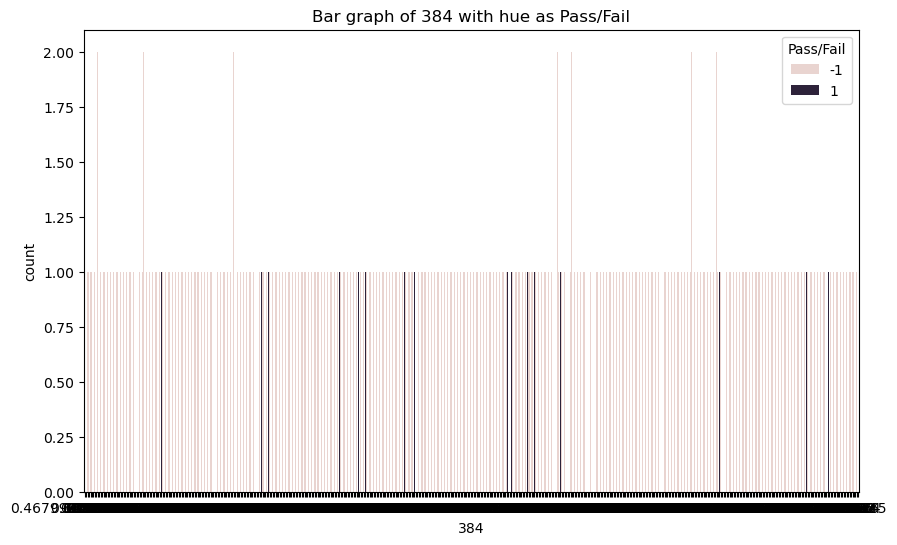

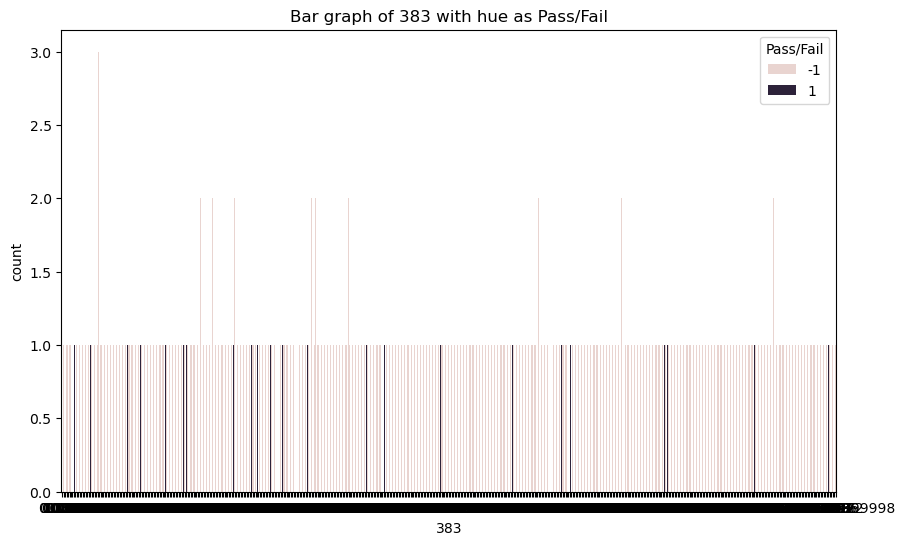

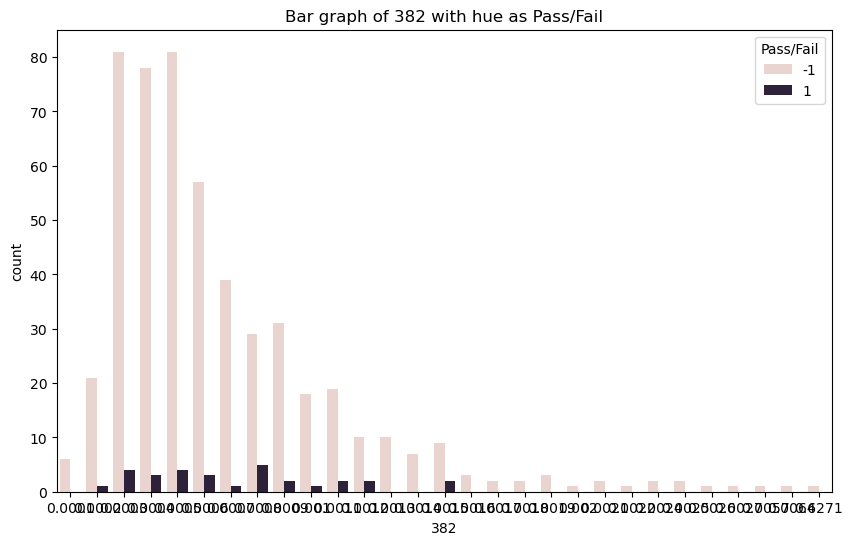

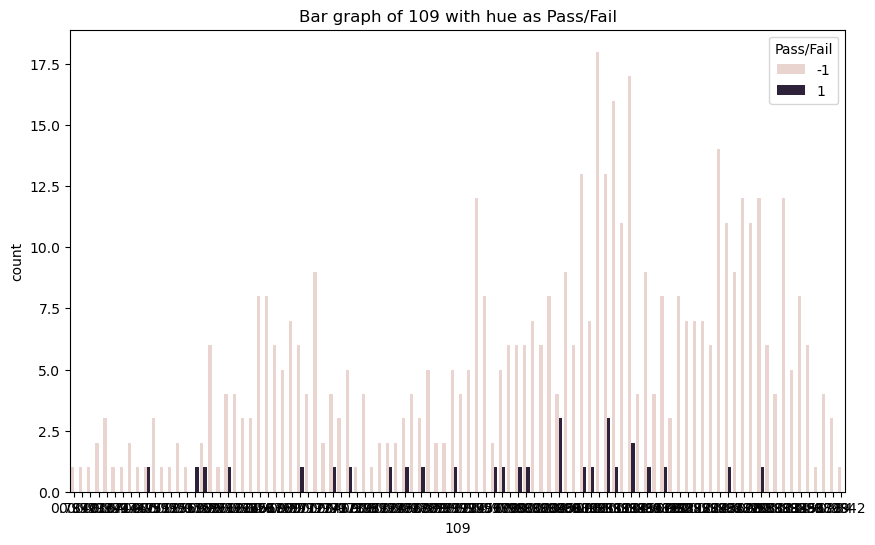

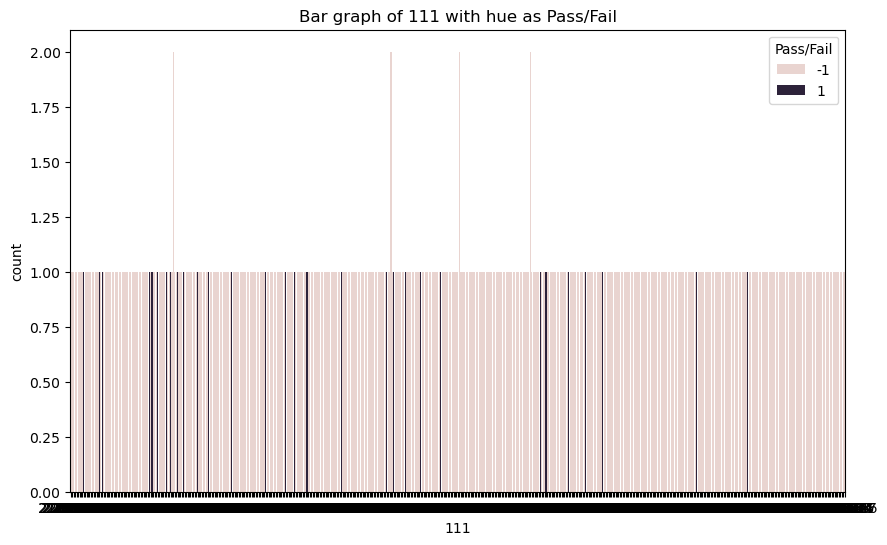

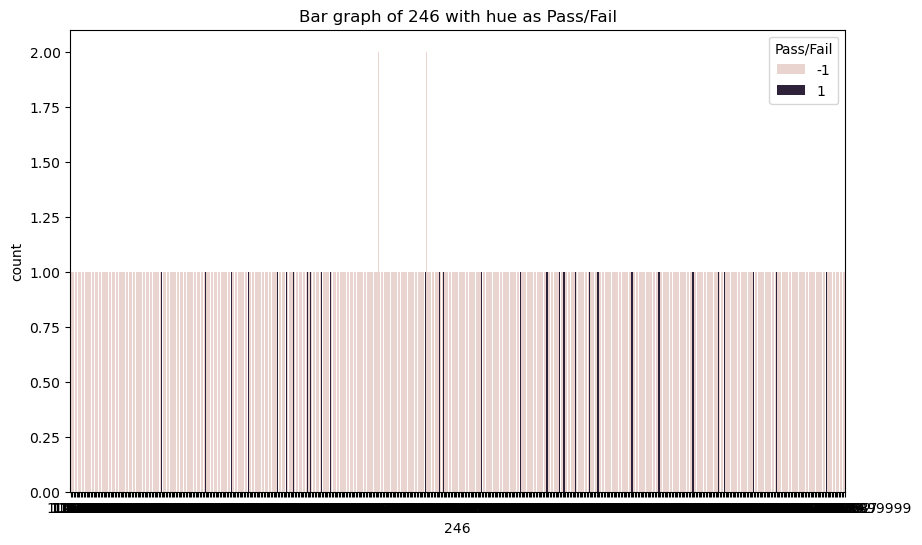

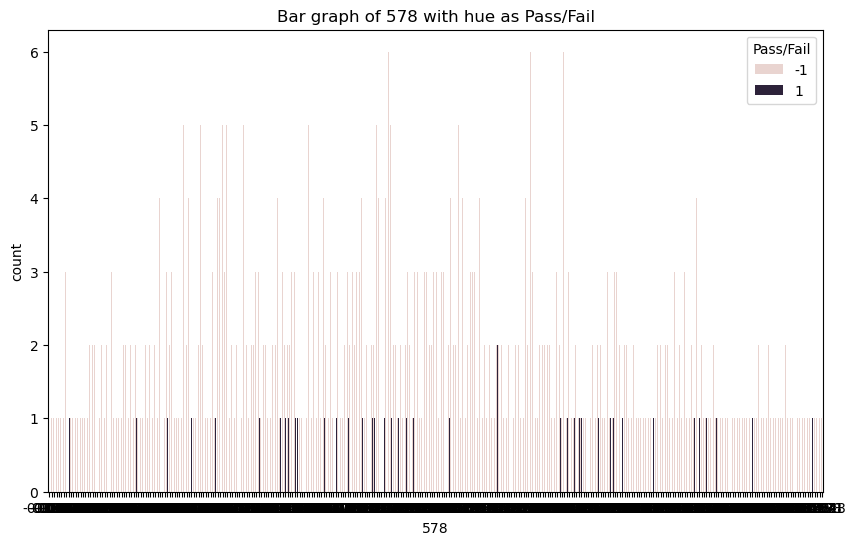

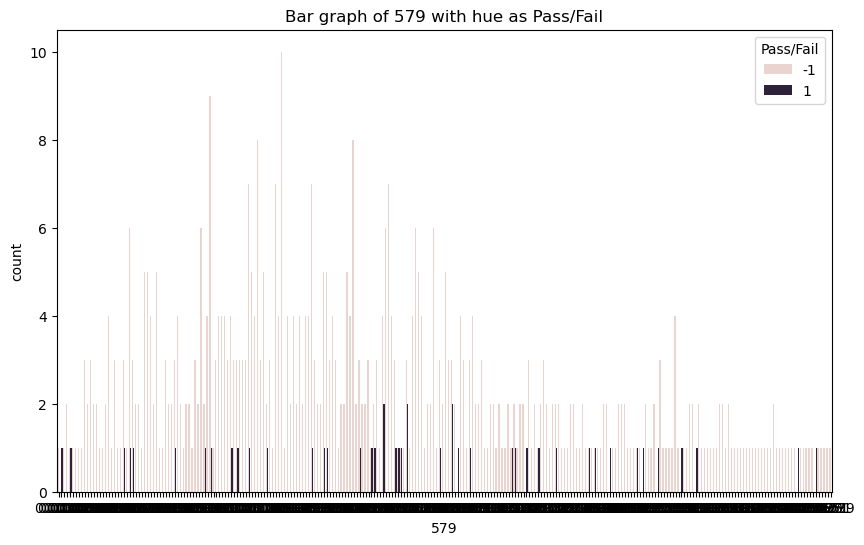

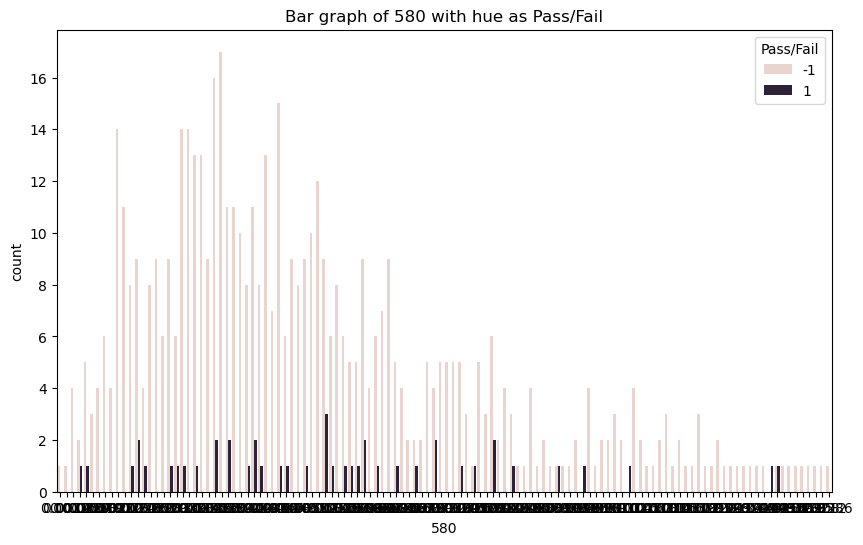

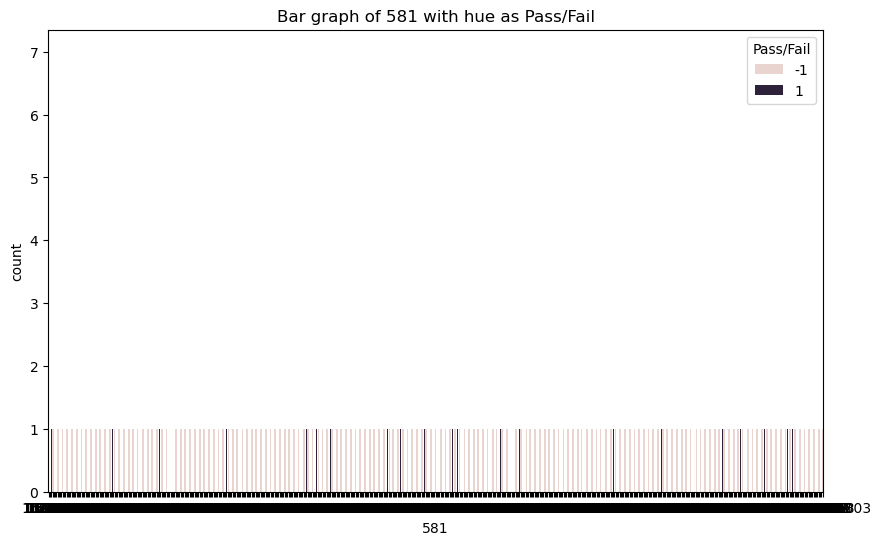

In [26]:
selected_attributes = sorted_filtered_null_percentages.index

# Plot bar graph for each selected attribute with hue as Pass/Fail
for attribute in selected_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=attribute, hue='Pass/Fail', data=drop_const)
    plt.title(f'Bar graph of {attribute} with hue as Pass/Fail')
    plt.show()

### Noise refers to random or irrelevant information that can obscure or distort the true underlying patterns or signals in the data
- Measurement Errors: Inaccuracies in data collection instruments or processes can introduce noise. For example, sensor errors or manual data entry mistakes.
- Sensor errors or manual data entry mistakes
- Outliers: Extreme values that deviate significantly from other observations in the dataset. These can be due to errors or genuine but rare events.
- Irrelevant Features: Features that do not contribute to the predictive power of a model and can introduce noise by adding unnecessary complexity.
- Random Variations: Natural fluctuations in data that do not follow any specific pattern or trend.
- Missing Values: Incomplete data can be considered noise if not handled properly, as they can lead to biased or incorrect conclusions.
- Environmental Factors: External factors that affect the data but are not related to the variables of interest. For example, background noise in audio recordings.

### Drop all the attributes which has 60% null values

In [27]:
# Calculate the threshold for dropping columns
threshold = len(drop_const) * 0.6

# Drop columns with more than 70% null values
df_dropped = drop_const.dropna(thresh=threshold, axis=1)

print("Original DataFrame:")
print(drop_const.shape)
print("\nDataFrame after dropping columns with more than 60% null values:")
print(df_dropped.shape)

print(df_dropped)

Original DataFrame:
(1567, 469)

DataFrame after dropping columns with more than 60% null values:
(1567, 437)
            0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

 

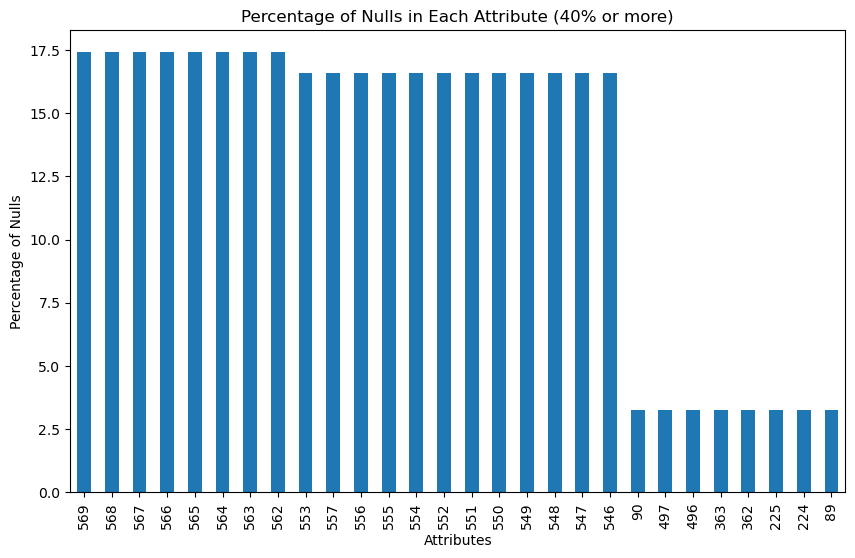

In [30]:
# Count nulls in each attribute
null_counts = df_dropped.isnull().sum()

# Calculate percentage of nulls
null_percentages = (null_counts / len(df_dropped)) * 100


# Filter attributes with 40% or more null values
filtered_null_percentages = null_percentages[null_percentages >= 3]

# Sort percentages in descending order
sorted_filtered_null_percentages = filtered_null_percentages.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
sorted_filtered_null_percentages.plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Percentage of Nulls')
plt.title('Percentage of Nulls in Each Attribute (40% or more)')
plt.show()

### Bayesian approach (Imputation)
for single imputation. Bayesian methods provide a probabilistic framework for estimating missing values, which can be particularly useful when you want to incorporate prior knowledge or uncertainty into the imputation process


##### Bayesian Imputation Overview
- Bayesian Framework: Bayesian imputation treats the missing data problem as a statistical inference problem. It uses prior distributions and observed data to estimate the posterior distribution of the missing values.
- Iterative Process: The IterativeImputer models each feature with missing values as a function of other features in a round-robin fashion. This means it iteratively estimates the missing values by using the current estimates of the other missing values.
- Regression Models: Typically, Bayesian Ridge Regression is used within the IterativeImputer. This regression model incorporates prior distributions over the parameters, which helps in regularizing the estimates and handling multicollinearity among features.
##### Steps in Bayesian Imputation
- Initialization: Initially, missing values are filled with simple imputation methods like mean, median, or mode.
- Model Fitting: For each feature with missing values, a regression model is fitted using the other features as predictors. The model is trained on the observed data.
- Prediction and Imputation: The trained model is then used to predict the missing values. These predictions are used to update the dataset.
- Iteration: Steps 2 and 3 are repeated for a specified number of iterations or until convergence. Each iteration refines the estimates of the missing values.
##### Advantages of Bayesian Imputation
- Incorporates Uncertainty: By using a Bayesian framework, the imputation process accounts for the uncertainty in the estimates, providing more robust and reliable imputations.
- Handles Complex Relationships: The iterative nature allows it to capture complex relationships between features, leading to more accurate imputations.
- Regularization: The use of Bayesian Ridge Regression helps in regularizing the estimates, which is particularly useful in high-dimensional datasets.

In [32]:
# Initialize the IterativeImputer with max_iter=10 and random_state=0
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
data_imputed = pd.DataFrame(imputer.fit_transform(df_dropped), columns=df_dropped.columns)

print(data_imputed)


            0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     583     584  \
0     1.500500  0.016200 -0.003400 

In [4]:
## imputation is a time consuming operation, storing the result to CSV, in case we delete and modify the imputed dataframe , we can load from file and save some time
#data_imputed.to_csv('data/imputedData.csv', index=False)
data_imputed = pd.read_csv('data/imputedData.csv')

data_imputed.shape

(1567, 437)

In [5]:
# make sure all the attribute nulls are replaced
null_counts = data_imputed.isnull().sum()

null_counts

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 437, dtype: int64

#### Try to find the correlation between variables

Given the large number of attributes, a good approach is to use pair plots or correlation heatmaps to visualize the relationships between the attributes and the target.

- Pair Plot: This is useful for visualizing the distribution of data and relationships between pairs of attributes. However, with 500 attributes, this might be overwhelming. You can start by selecting a subset of attributes that you suspect might have strong relationships with the target.
- Correlation Heatmap: This can help you identify which attributes are most correlated with the target. You can then focus on these attributes for further analysis.
- Feature Importance: Using machine learning models like Random Forest or Gradient Boosting, you can determine the importance of each attribute in predicting the target. This can help you narrow down the most relevant attributes to visualize.

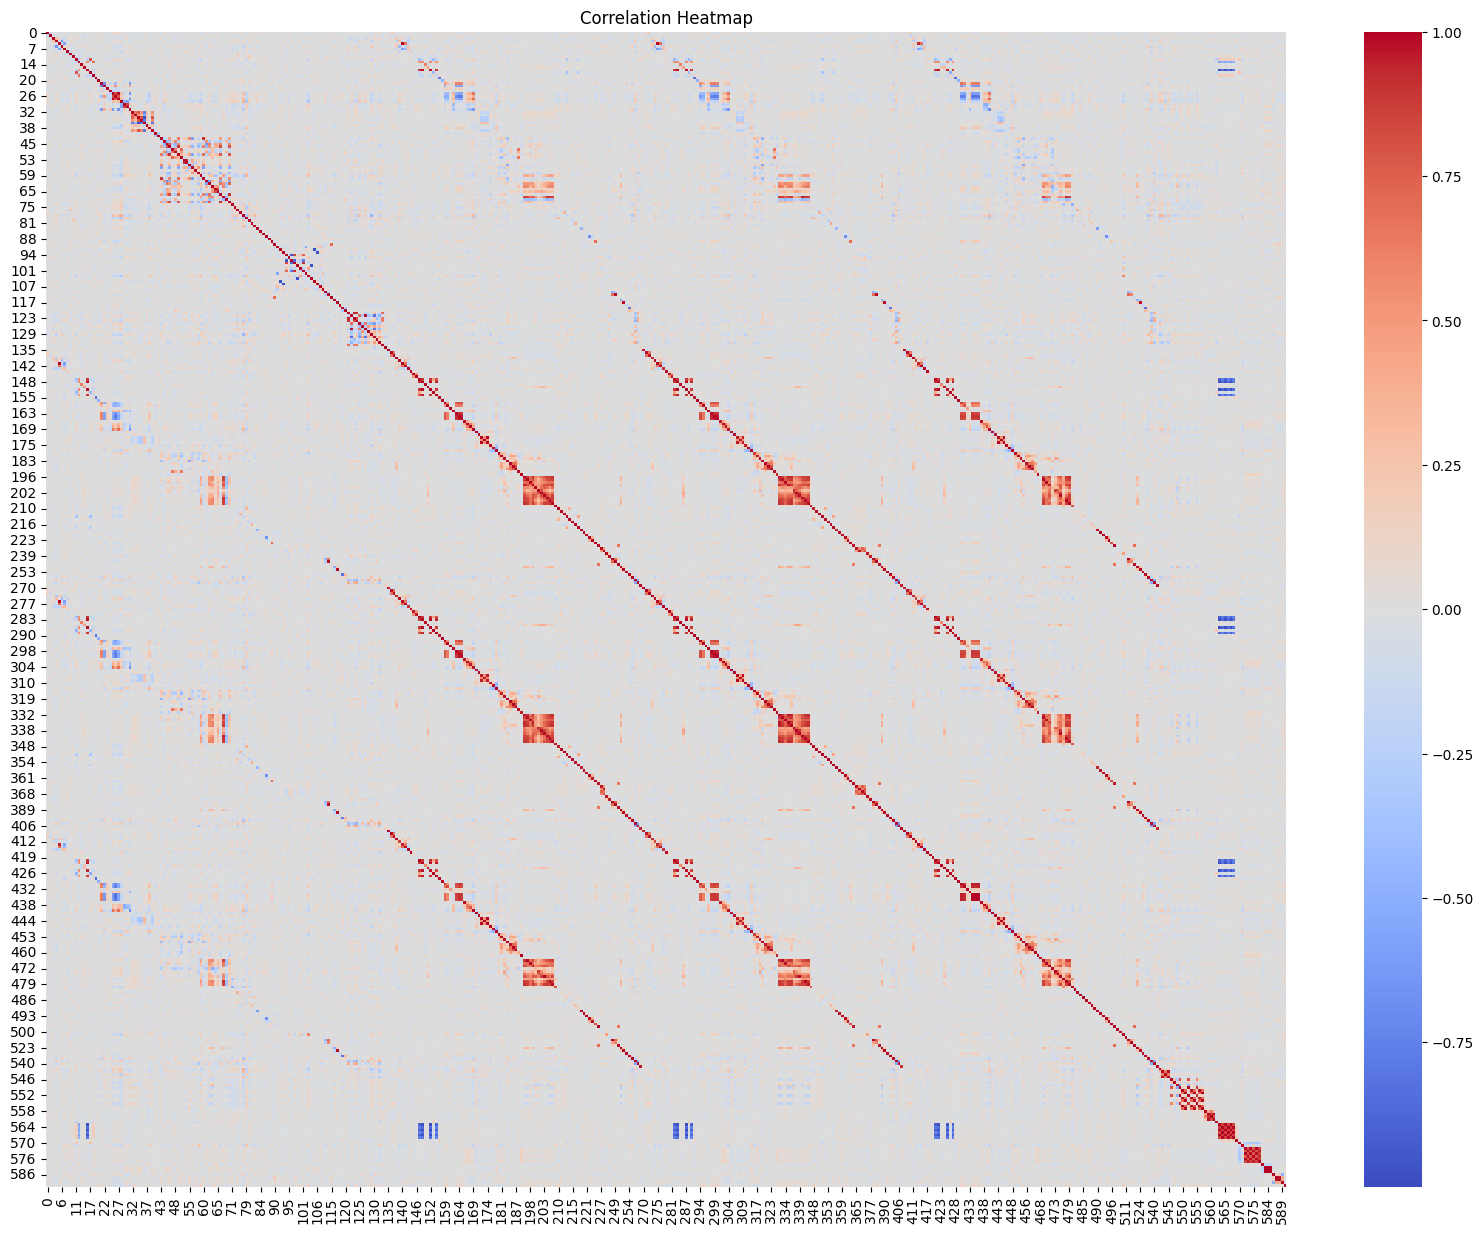

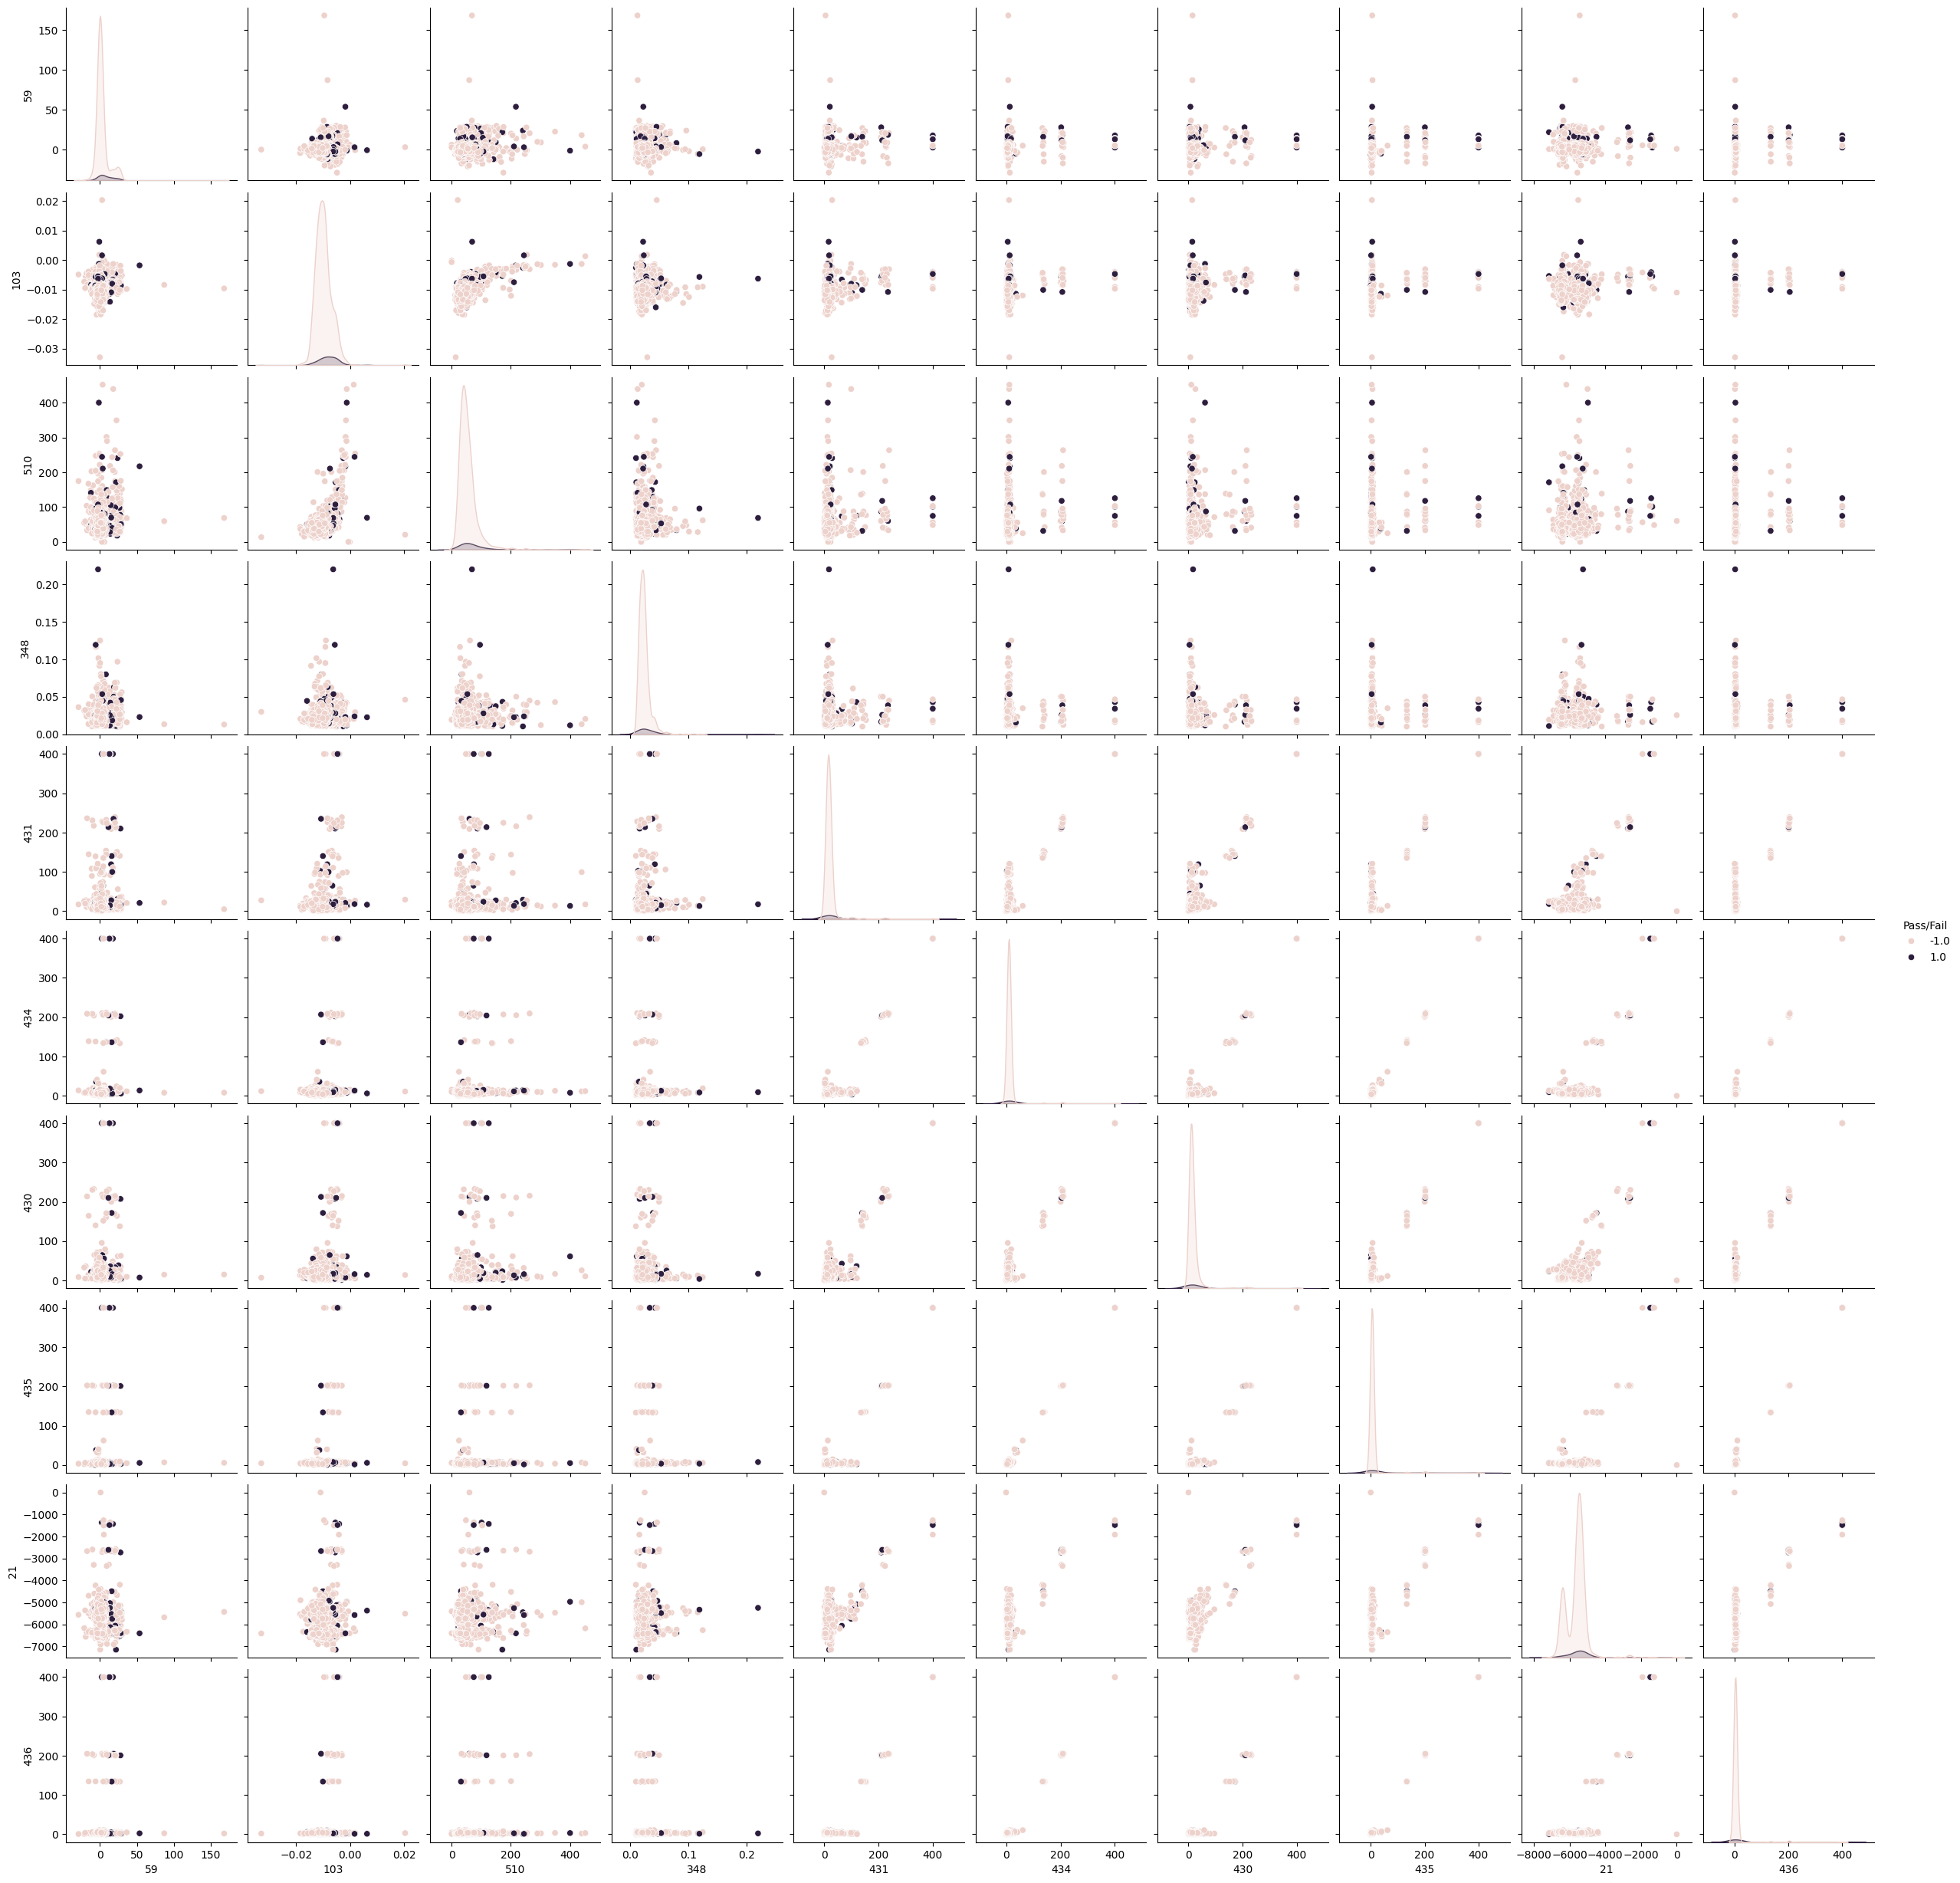

In [6]:
corr_matrix = data_imputed.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Select top 10 attributes most correlated with the target for pair plot
top_attributes = corr_matrix['Pass/Fail'].abs().sort_values(ascending=False).head(11).index
sns.pairplot(data_imputed[top_attributes], hue='Pass/Fail')
plt.show()

There are several methods to handle outliers, depending on the context and the nature of your data. Here are some common options:

1. Replace with Median
Why: The median is less sensitive to extreme values than the mean, making it a robust measure of central tendency.
How: Replace outliers with the median value of the column.
2. Replace with Mode
Why: Useful for categorical data where the most frequent value is a better representative.
How: Replace outliers with the mode (most frequent value) of the column.
3. Cap and Floor
Why: Limits the impact of outliers by setting them to a maximum or minimum threshold.
How: Define upper and lower bounds (e.g., 1st and 99th percentiles) and replace values outside these bounds with the respective thresholds.
4. Winsorization
Why: Similar to capping and flooring but involves modifying the data to limit extreme values.
How: Replace extreme values with the nearest value within the specified percentile range.
5. Transformation
Why: Reduces the impact of outliers by transforming the data distribution.
How: Apply transformations like log, square root, or Box-Cox to reduce skewness.
6. Imputation with Predictive Models
Why: Uses the relationship between variables to estimate and replace outliers.
How: Train a model (e.g., regression, k-nearest neighbors) to predict and replace outliers based on other features.
7. Remove Outliers
Why: Sometimes, outliers are errors or irrelevant to the analysis.
How: Identify and remove rows containing outliers.

In [7]:
# Function to identify and replace outliers with NaN
def replace_outliers_with_nan(df):
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        threshold = 3 * std
        outliers = (df[column] - mean).abs() > threshold
        df.loc[outliers, column] = np.nan
    return df

In [8]:
# Replace outliers with NaN
df_with_nan = replace_outliers_with_nan(data_imputed)

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df_imputed_out = pd.DataFrame(imputer.fit_transform(df_with_nan), columns=data_imputed.columns)

print("Original DataFrame with outliers replaced by NaN:")
print(df_with_nan)

print("\nDataFrame after KNN imputation:")
print(df_imputed_out)

Original DataFrame with outliers replaced by NaN:
            0        1          2          3       4         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235   
...       ...      ...        ...        ...     ...       ...     ...   
1562  2899.41  2464.36  2179.7333        NaN  1.4843       NaN  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444        NaN  1.5978   85.1011  0.1235   

             8         9        10  ...      577     582     

In [9]:
X = df_imputed_out.drop(columns=['Pass/Fail'])
y = df_imputed_out['Pass/Fail']

# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop highly correlated features
X_reduced = X.drop(columns=to_drop)

# Calculate feature importance using Pearson correlation with the target
feature_importance = X_reduced.apply(lambda x: x.corr(y))

# Set a threshold for feature importance (e.g., 0.15)
threshold = 0.15

# Drop features with importance less than the threshold
final_features = feature_importance[feature_importance.abs() >= threshold].index

df_final = X_reduced[final_features]

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after removing collinearity: {X_reduced.shape[1]}")
print(f"Number of features after removing low importance: {df_final.shape[1]}")
print("Final features:")
print(df_final.columns.tolist())

Original number of features: 436
Number of features after removing collinearity: 250
Number of features after removing low importance: 0
Final features:
[]


In [10]:
df_modeling = pd.concat([X_reduced, y_out], axis=1)

In [11]:
X = df_modeling.drop(columns='Pass/Fail')
y = df_modeling['Pass/Fail']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Normalize data

In [ ]:


# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Initialize the Sequential Feature Selector with forward selection
# Adjust n_features_to_select to be less than the number of features
sfs = SequentialFeatureSelector(model, n_features_to_select=25, direction='forward')

# Fit the model with scaled data
sfs.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]

print("Selected features:", selected_features)

# Train the model with selected features on scaled data
model.fit(X_train_scaled[:, sfs.get_support()], y_train)

# Predict and evaluate the model on scaled data
y_pred = model.predict(X_test_scaled[:, sfs.get_support()])
accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy with selected features:", accuracy)

Model: Feature Importance
Best Parameters: {'classification__C': 1, 'feature_selection__max_features': 10}
Best Accuracy: 0.9235668789808917
Execution Time: 119.5362377166748

Model: RFE
Best Parameters: {'classification__C': 0.1, 'feature_selection__n_features_to_select': 10}
Best Accuracy: 0.9256900212314225
Execution Time: 222.06996631622314

Model: PCA
Best Parameters: {'classification__C': 0.1, 'feature_selection__n_components': 10}
Best Accuracy: 0.9235668789808917
Execution Time: 6.42973518371582

Model: L1 Regularization
Best Parameters: {'classification__C': 0.1, 'feature_selection__estimator__alpha': 0.01}
Best Accuracy: 0.9065817409766455
Execution Time: 5.200077772140503

Model: Decision Tree
Best Parameters: {'classification__max_depth': 5}
Best Accuracy: 0.8980891719745223
Execution Time: 26.82135581970215

Model: Random Forest
Best Parameters: {'classification__max_depth': 5, 'classification__n_estimators': 50}
Best Accuracy: 0.9235668789808917
Execution Time: 672.613813

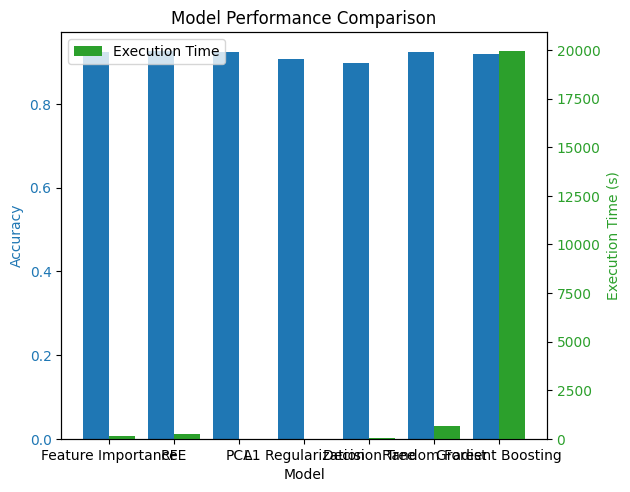

In [16]:

# Define parameter grids
param_grids = {
    'Feature Importance': {
        'feature_selection__max_features': [10, 50, 100],
        'classification__C': [0.1, 1, 10]
    },
    'RFE': {
        'feature_selection__n_features_to_select': [10, 50, 100],
        'classification__C': [0.1, 1, 10]
    },
    'PCA': {
        'feature_selection__n_components': [10, 50, 100],
        'classification__C': [0.1, 1, 10]
    },
    'L1 Regularization': {
        'feature_selection__estimator__alpha': [0.001, 0.01, 0.1, 1, 10],
        'classification__C': [0.1, 1, 10]
    },
    'Decision Tree': {
        'classification__max_depth': [5, 10, 15, 20, None]
    },
    'Random Forest': {
        'classification__n_estimators': [50, 100, 200, 250],
        'classification__max_depth': [5, 10, 15, 20, None]
    },
    'Gradient Boosting': {
        'classification__n_estimators': [50, 100, 200, 250],
        'classification__max_depth': [5, 10, 15, 20, None]
    }
}

# Models and Feature Selection Methods
models = [
    ('Feature Importance', SelectFromModel(estimator=RandomForestClassifier(random_state=43)), LogisticRegression(max_iter=1000, random_state=43)),
    ('RFE', RFE(estimator=LogisticRegression(max_iter=10000), step=1), LogisticRegression(max_iter=1000, random_state=43)),
    ('PCA', PCA(), LogisticRegression(max_iter=1000, random_state=43)),
    ('L1 Regularization', SelectFromModel(estimator=Lasso(max_iter=10000)), LogisticRegression(max_iter=1000, random_state=43)),
    ('Decision Tree', None, DecisionTreeClassifier(random_state=43)),
    ('Random Forest', None, RandomForestClassifier(random_state=43)),
    ('Gradient Boosting', None, GradientBoostingClassifier(random_state=43))
]

results = []

for name, feature_selection, classifier in models:
    start_time = time.time()
    
    if name in ['PCA', 'Feature Importance', 'RFE', 'L1 Regularization']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', feature_selection),
            ('classification', classifier)
        ])
        grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=7)
    else:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('classification', classifier)
        ])
        grid_search = GridSearchCV(pipe, param_grid=param_grids[name], cv=7)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    exec_time = time.time() - start_time

    n_features = X_train.shape[1]
    if name != 'PCA' and feature_selection:
        n_features = sum(best_model.named_steps['feature_selection'].get_support())
    elif name == 'PCA':
        n_features = best_model.named_steps['feature_selection'].n_components_
    
    results.append({
        'model': name,
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'exec_time': exec_time,
        'n_features': n_features
    })

    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Accuracy: {accuracy}")
    print(f"Execution Time: {exec_time}\n")

# Plotting the results
labels = [r['model'] for r in results]
accuracies = [r['accuracy'] for r in results]
n_features = [r['n_features'] for r in results]
exec_times = [r['exec_time'] for r in results]

x = np.arange(len(labels))  # Label locations

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(x - 0.2, accuracies, 0.4, label='Accuracy', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.bar(x + 0.2, exec_times, 0.4, label='Execution Time', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(x, labels, rotation='vertical')
plt.title('Model Performance Comparison')
plt.legend(loc='upper left')
plt.show()


Model: Gradient Boosting
Best Parameters: {'classification__max_depth': 5, 'classification__n_estimators': 100}
Best Accuracy: 0.9193205944798302
Execution Time: 19930.50100517273



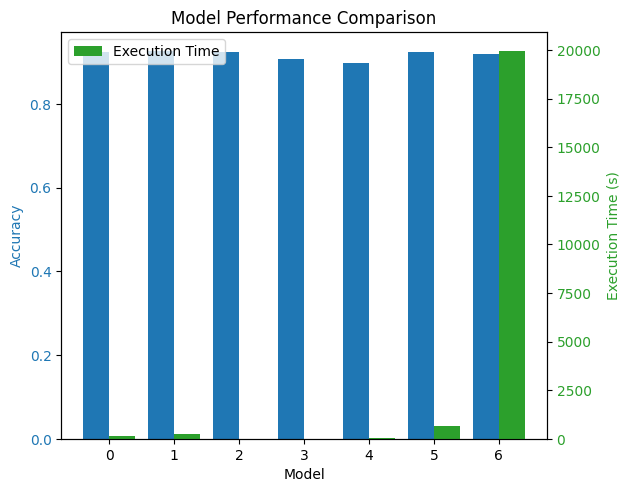

In [19]:
print(f"Model: {name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {accuracy}")
print(f"Execution Time: {exec_time}\n")

# Plotting the results
labels = [r['model'] for r in results]
accuracies = [r['accuracy'] for r in results]
n_features = [r['n_features'] for r in results]
exec_times = [r['exec_time'] for r in results]

x = np.arange(len(labels))  # Label locations

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(x - 0.2, accuracies, 0.4, label='Accuracy', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.bar(x + 0.2, exec_times, 0.4, label='Execution Time', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(rotation=90)
plt.title('Model Performance Comparison')
plt.legend(loc='upper left')
plt.show()


In [21]:
import pickle

In [23]:
# Save to file 
with open('results.pkl', 'wb') as f: 
    pickle.dump(results, f) 
    
print("Results saved to file 'results.pkl'")

Results saved to file 'results.pkl'


In [24]:
# Read from file 
with open('results.pkl', 'rb') as f: 
    results = pickle.load(f) 

# Extract data for plotting 
labels = [r['model'] for r in results] 
accuracies = [r['accuracy'] for r in results] 
n_features = [r['n_features'] for r in results] 
exec_times = [r['exec_time'] for r in results] 

print("Results read from file 'results.pkl'")

Results read from file 'results.pkl'


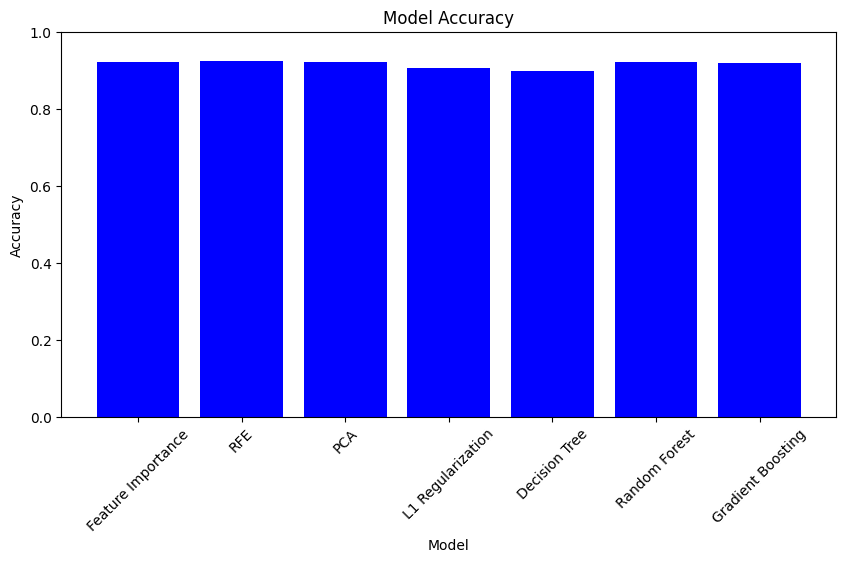

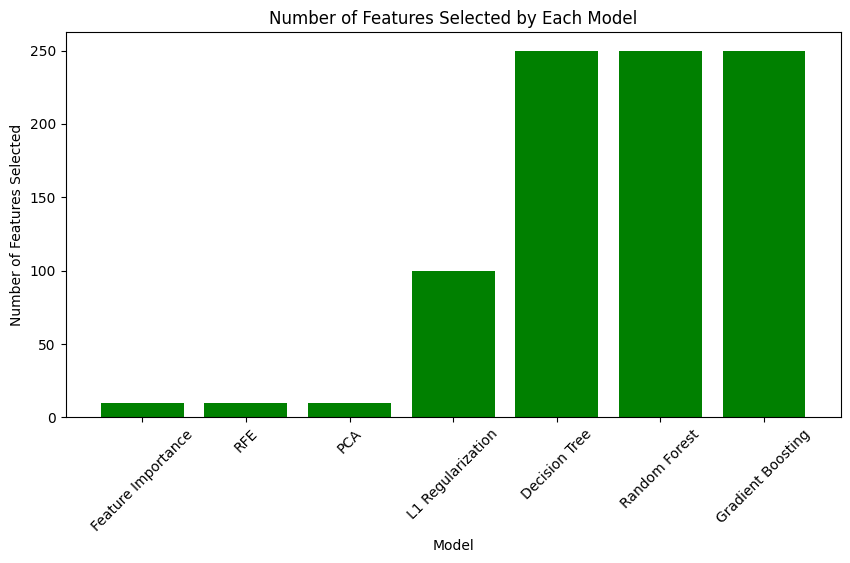

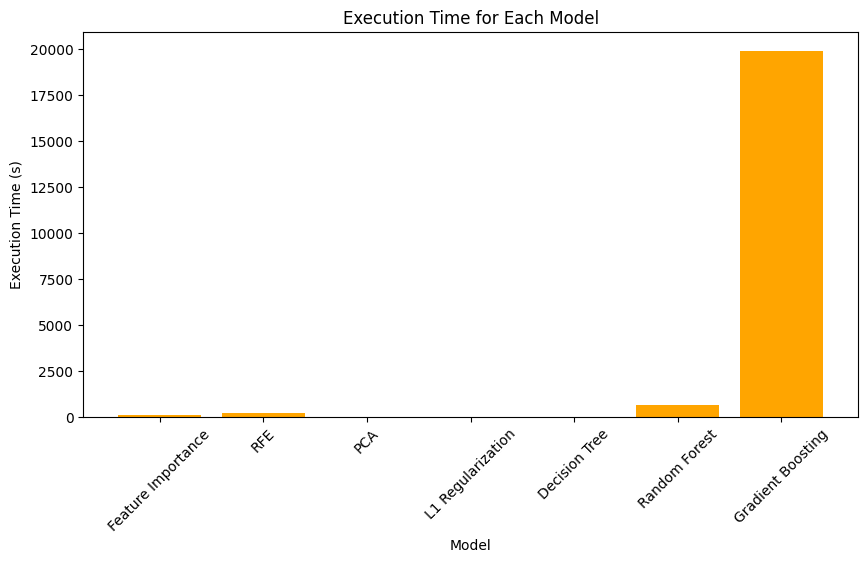

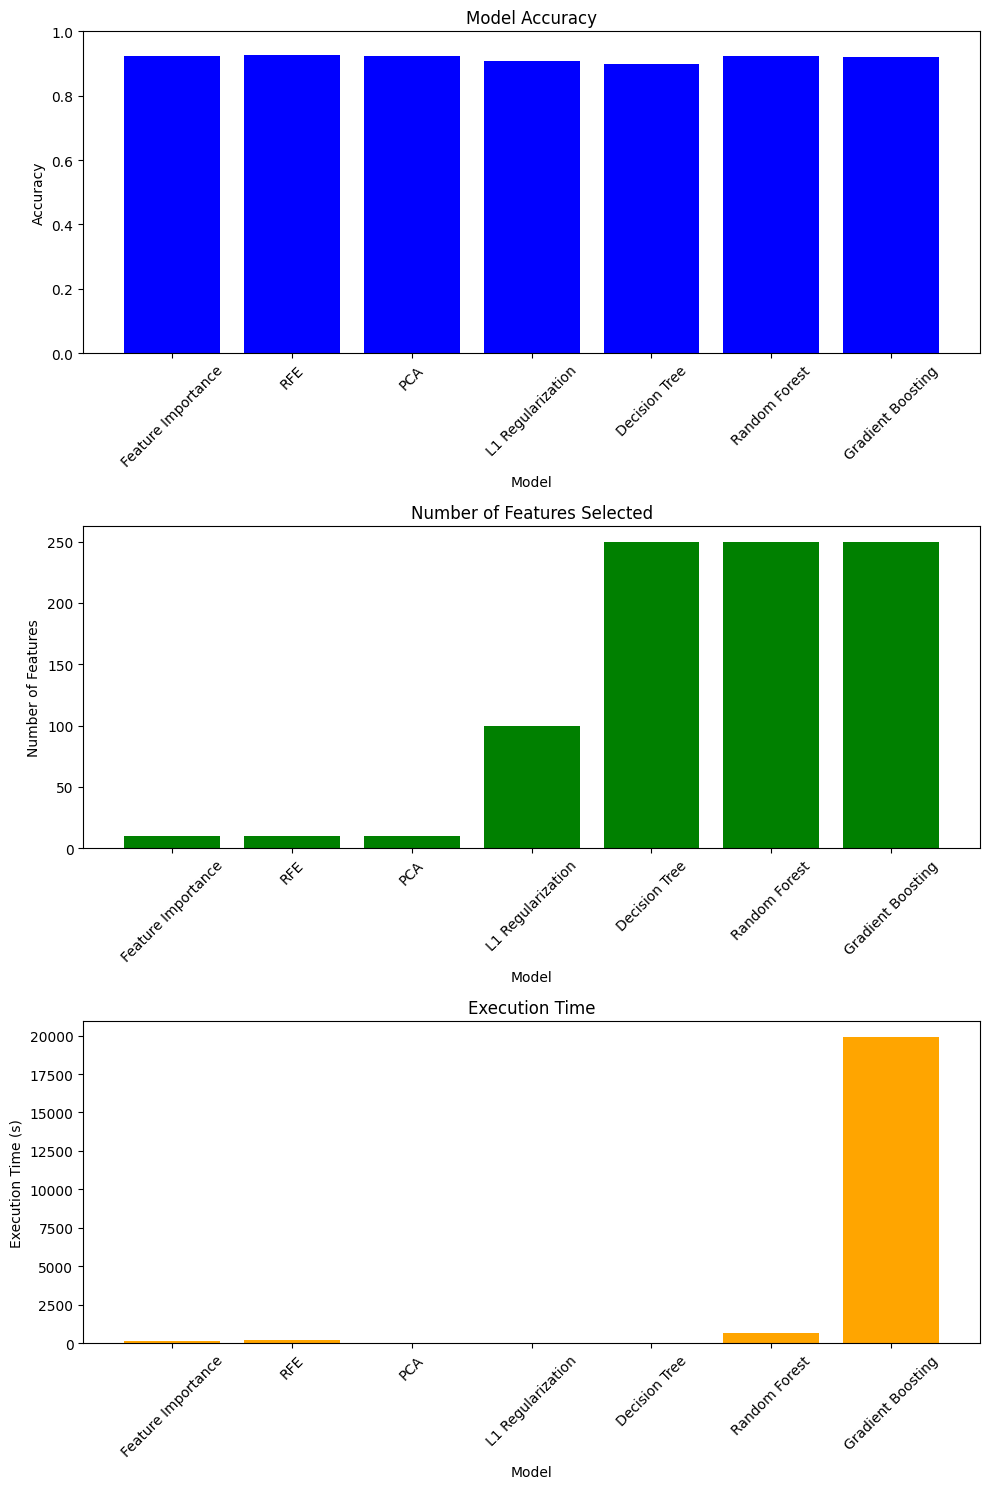

In [25]:
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plotting Number of Features Selected
plt.figure(figsize=(10, 5))
plt.bar(labels, n_features, color='green')
plt.xlabel('Model')
plt.ylabel('Number of Features Selected')
plt.title('Number of Features Selected by Each Model')
plt.xticks(rotation=45)
plt.show()

# Plotting Execution Time
plt.figure(figsize=(10, 5))
plt.bar(labels, exec_times, color='orange')
plt.xlabel('Model')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time for Each Model')
plt.xticks(rotation=45)
plt.show()

# Combined Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy Plot
axs[0].bar(labels, accuracies, color='blue')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=45)

# Number of Features Plot
axs[1].bar(labels, n_features, color='green')
axs[1].set_title('Number of Features Selected')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Number of Features')
axs[1].tick_params(axis='x', rotation=45)

# Execution Time Plot
axs[2].bar(labels, exec_times, color='orange')
axs[2].set_title('Execution Time')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('Execution Time (s)')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### In next module we will evaluate different models and also increase the selected features 